# **Yulu Case Study:**

# **About Yulu**

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

# **How you can help here? The company wants to know:**

Which variables are significant in predicting the demand for shared electric cycles in the Indian market? How well those variables describe the electric cycle demands.

# **Column Profiling:**

**datetime:** datetime

**season:** season (1: spring, 2: summer, 3: fall, 4: winter)

**holiday:** whether day is a holiday or not.

**workingday:** if day is neither weekend nor holiday is 1, otherwise is 0.

**weather:**

1: Clear, Few clouds, partly cloudy, partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

**temp:** temperature in Celsius

**atemp:** feeling temperature in Celsius

**humidity:** humidity

**windspeed:** wind speed

**casual:** count of casual users

**registered:** count of registered users

**count:** count of total rental bikes including both casual and registered

# **Part A: Import the dataset and Initial Analysis:**

In [1]:
# Import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the Yulu dataset and create a dataframe for analysis. Print the first 5 rows
df = pd.read_csv("yulu.csv")
df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [3]:
# Print the last 5 rows
df.tail()

datetime  season  holiday  workingday  weather   temp  \
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
10881  19.695        50    26.0027       7         329    336  
10882  17.425        57    15.0013      10         231    241  
10883  15.910        61    15.0013       4         164    168  
10884  17.425        61     6.0032      12         117    129  
10885  16.665        66     8.9981       4          84     88

In [4]:
# Print the shape of the dataframe
df.shape

(10886, 12)

In [5]:
# Data type of the attributes of the dataframe
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [6]:
# Info on the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
df.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [8]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [9]:
df.keys()

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [10]:
# Unique values for each feature
df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

### **The shape of the dataset is (10886,12). 10886 unique values in the datetime column indicates that each row is a unique entry for Yulu Bike Rentals.**

In [11]:
# Check for duplicate values
df.duplicated().sum()

np.int64(0)

In [12]:
# Check for missing values and their percentage
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Combine into a dataFrame for better readability
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage})
missing_df

Missing Values  Percentage (%)
datetime                 0             0.0
season                   0             0.0
holiday                  0             0.0
workingday               0             0.0
weather                  0             0.0
temp                     0             0.0
atemp                    0             0.0
humidity                 0             0.0
windspeed                0             0.0
casual                   0             0.0
registered               0             0.0
count                    0             0.0

# **The dataset is clean with no duplicates and no missing values!**

In [13]:
# For season feature, replace 1: spring, 2: summer, 3: fall, 4: winter
# For holiday feature, replace 0: no holiday, 1: holiday
# For workingday feature, replace 0: not a working day, 1: working day

df['season'] = df['season'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
df['holiday'] = df['holiday'].replace({0: 'no', 1: 'yes'})
df['workingday'] = df['workingday'].replace({0: 'no', 1: 'yes'})
df

datetime  season holiday workingday  weather   temp   atemp  \
0      2011-01-01 00:00:00  spring      no         no        1   9.84  14.395   
1      2011-01-01 01:00:00  spring      no         no        1   9.02  13.635   
2      2011-01-01 02:00:00  spring      no         no        1   9.02  13.635   
3      2011-01-01 03:00:00  spring      no         no        1   9.84  14.395   
4      2011-01-01 04:00:00  spring      no         no        1   9.84  14.395   
...                    ...     ...     ...        ...      ...    ...     ...   
10881  2012-12-19 19:00:00  winter      no        yes        1  15.58  19.695   
10882  2012-12-19 20:00:00  winter      no        yes        1  14.76  17.425   
10883  2012-12-19 21:00:00  winter      no        yes        1  13.94  15.910   
10884  2012-12-19 22:00:00  winter      no        yes        1  13.94  17.425   
10885  2012-12-19 23:00:00  winter      no        yes        1  13.12  16.665   

       humidity  windspeed  casual  registered  count  
0            81     0.0000       3          13     16  
1            80     0.0000       8          32     40  
2            80     0.0000       5          27     32  
3            75     0.0000       3          10     13  
4            75     0.0000       0           1      1  
...         ...        ...     ...         ...    ...  
10881        50    26.0027       7         329    336  
10882        57    15.0013      10         231    241  
10883        61    15.0013       4         164    168  
10884        61     6.0032      12         117    129  
10885        66     8.9981       4          84     88  

[10886 rows x 12 columns]

In [14]:
# Split the datetime feature into year, month and day features for further analysis
df["year"] = pd.to_datetime(df["datetime"]).dt.year
df["month"] = pd.to_datetime(df["datetime"]).dt.month
df["day"] = pd.to_datetime(df["datetime"]).dt.day
df

datetime  season holiday workingday  weather   temp   atemp  \
0      2011-01-01 00:00:00  spring      no         no        1   9.84  14.395   
1      2011-01-01 01:00:00  spring      no         no        1   9.02  13.635   
2      2011-01-01 02:00:00  spring      no         no        1   9.02  13.635   
3      2011-01-01 03:00:00  spring      no         no        1   9.84  14.395   
4      2011-01-01 04:00:00  spring      no         no        1   9.84  14.395   
...                    ...     ...     ...        ...      ...    ...     ...   
10881  2012-12-19 19:00:00  winter      no        yes        1  15.58  19.695   
10882  2012-12-19 20:00:00  winter      no        yes        1  14.76  17.425   
10883  2012-12-19 21:00:00  winter      no        yes        1  13.94  15.910   
10884  2012-12-19 22:00:00  winter      no        yes        1  13.94  17.425   
10885  2012-12-19 23:00:00  winter      no        yes        1  13.12  16.665   

       humidity  windspeed  casual  registered  count  year  month  day  
0            81     0.0000       3          13     16  2011      1    1  
1            80     0.0000       8          32     40  2011      1    1  
2            80     0.0000       5          27     32  2011      1    1  
3            75     0.0000       3          10     13  2011      1    1  
4            75     0.0000       0           1      1  2011      1    1  
...         ...        ...     ...         ...    ...   ...    ...  ...  
10881        50    26.0027       7         329    336  2012     12   19  
10882        57    15.0013      10         231    241  2012     12   19  
10883        61    15.0013       4         164    168  2012     12   19  
10884        61     6.0032      12         117    129  2012     12   19  
10885        66     8.9981       4          84     88  2012     12   19  

[10886 rows x 15 columns]

In [15]:
# Rename the numbers in the month column into its respective month name
df['month'] = df['month'].replace({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May',
                                   6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October',
                                   11: 'November', 12: 'December'})
df

datetime  season holiday workingday  weather   temp   atemp  \
0      2011-01-01 00:00:00  spring      no         no        1   9.84  14.395   
1      2011-01-01 01:00:00  spring      no         no        1   9.02  13.635   
2      2011-01-01 02:00:00  spring      no         no        1   9.02  13.635   
3      2011-01-01 03:00:00  spring      no         no        1   9.84  14.395   
4      2011-01-01 04:00:00  spring      no         no        1   9.84  14.395   
...                    ...     ...     ...        ...      ...    ...     ...   
10881  2012-12-19 19:00:00  winter      no        yes        1  15.58  19.695   
10882  2012-12-19 20:00:00  winter      no        yes        1  14.76  17.425   
10883  2012-12-19 21:00:00  winter      no        yes        1  13.94  15.910   
10884  2012-12-19 22:00:00  winter      no        yes        1  13.94  17.425   
10885  2012-12-19 23:00:00  winter      no        yes        1  13.12  16.665   

       humidity  windspeed  casual  registered  count  year     month  day  
0            81     0.0000       3          13     16  2011   January    1  
1            80     0.0000       8          32     40  2011   January    1  
2            80     0.0000       5          27     32  2011   January    1  
3            75     0.0000       3          10     13  2011   January    1  
4            75     0.0000       0           1      1  2011   January    1  
...         ...        ...     ...         ...    ...   ...       ...  ...  
10881        50    26.0027       7         329    336  2012  December   19  
10882        57    15.0013      10         231    241  2012  December   19  
10883        61    15.0013       4         164    168  2012  December   19  
10884        61     6.0032      12         117    129  2012  December   19  
10885        66     8.9981       4          84     88  2012  December   19  

[10886 rows x 15 columns]

In [16]:
# Drop the redundant feature, datetime, after extracting the year, month and day
df = df.drop(['datetime'], axis = 1)
df

season holiday workingday  weather   temp   atemp  humidity  windspeed  \
0      spring      no         no        1   9.84  14.395        81     0.0000   
1      spring      no         no        1   9.02  13.635        80     0.0000   
2      spring      no         no        1   9.02  13.635        80     0.0000   
3      spring      no         no        1   9.84  14.395        75     0.0000   
4      spring      no         no        1   9.84  14.395        75     0.0000   
...       ...     ...        ...      ...    ...     ...       ...        ...   
10881  winter      no        yes        1  15.58  19.695        50    26.0027   
10882  winter      no        yes        1  14.76  17.425        57    15.0013   
10883  winter      no        yes        1  13.94  15.910        61    15.0013   
10884  winter      no        yes        1  13.94  17.425        61     6.0032   
10885  winter      no        yes        1  13.12  16.665        66     8.9981   

       casual  registered  count  year     month  day  
0           3          13     16  2011   January    1  
1           8          32     40  2011   January    1  
2           5          27     32  2011   January    1  
3           3          10     13  2011   January    1  
4           0           1      1  2011   January    1  
...       ...         ...    ...   ...       ...  ...  
10881       7         329    336  2012  December   19  
10882      10         231    241  2012  December   19  
10883       4         164    168  2012  December   19  
10884      12         117    129  2012  December   19  
10885       4          84     88  2012  December   19  

[10886 rows x 14 columns]

# **Part B1: Non-Graphical Analysis:**

In [17]:
# Get the unique values and value counts of season
print("Unique Season Values: ", df['season'].unique())
df['season'].value_counts()

Unique Season Values:  ['spring' 'summer' 'fall' 'winter']


season
winter    2734
summer    2733
fall      2733
spring    2686
Name: count, dtype: int64

In [18]:
# Get the unique values and value counts of holiday
print("Unique Holiday Values: ", df['holiday'].unique())
df['holiday'].value_counts()

Unique Holiday Values:  ['no' 'yes']


holiday
no     10575
yes      311
Name: count, dtype: int64

In [19]:
# Get the unique values and value counts of workingday
print("Unique Working Day Values: ", df['workingday'].unique())
df['workingday'].value_counts()

Unique Working Day Values:  ['no' 'yes']


workingday
yes    7412
no     3474
Name: count, dtype: int64

In [20]:
# Get the unique values and value counts of weather
print("Unique Weather Values: ", df['weather'].unique())
df['weather'].value_counts()

Unique Weather Values:  [1 2 3 4]


weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

### **Weather category 4 i.e., Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog has only 1 data entry. The amount of data for this weather category is very less to perform an analysis. Hence, it is suggested to drop the weather category 4.**

In [21]:
# Get the unique values and value counts of year
print("Unique Year Values: ", df['year'].unique())
df['year'].value_counts()

Unique Year Values:  [2011 2012]


year
2012    5464
2011    5422
Name: count, dtype: int64

In [22]:
# Get the unique values and value counts of month
print("Unique Month Values: ", df['month'].unique())
df['month'].value_counts()

Unique Month Values:  ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']


month
August       912
July         912
June         912
May          912
December     912
October      911
November     911
April        909
September    909
February     901
March        901
January      884
Name: count, dtype: int64

In [23]:
# Get the unique values and value counts of day
print("Unique Day Values: ", df['day'].unique())
df['day'].value_counts()

Unique Day Values:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


day
1     575
9     575
5     575
17    575
16    574
19    574
7     574
8     574
15    574
13    574
4     574
14    574
2     573
3     573
12    573
6     572
10    572
11    568
18    563
Name: count, dtype: int64

In [24]:
pd.crosstab(df["season"], df["weather"])

weather     1    2    3  4
season                    
fall     1930  604  199  0
spring   1759  715  211  1
summer   1801  708  224  0
winter   1702  807  225  0

In [25]:
pd.crosstab(df["holiday"], df["weather"])

weather     1     2    3  4
holiday                    
no       6988  2742  844  1
yes       204    92   15  0

In [26]:
pd.crosstab(df["workingday"], df["weather"])

weather        1     2    3  4
workingday                    
no          2353   897  224  0
yes         4839  1937  635  1

In [27]:
df.groupby(["season"])[["casual","registered","count"]].sum()

casual  registered   count
season                            
fall    142718      497944  640662
spring   41605      270893  312498
summer  129672      458610  588282
winter   78140      465894  544034

In [28]:
df.groupby(["holiday"])[["casual","registered","count"]].sum()

casual  registered    count
holiday                             
no       376964     1650704  2027668
yes       15171       42637    57808

In [29]:
df.groupby(["workingday"])[["casual","registered","count"]].sum()

casual  registered    count
workingday                             
no          206037      448835   654872
yes         186098     1244506  1430604

In [30]:
df.groupby(["weather"])[["casual","registered","count"]].sum()

casual  registered    count
weather                             
1        289900     1186163  1476063
2         87246      419914   507160
3         14983       87106   102089
4             6         158      164

# **Part B2: Outlier Detection:**

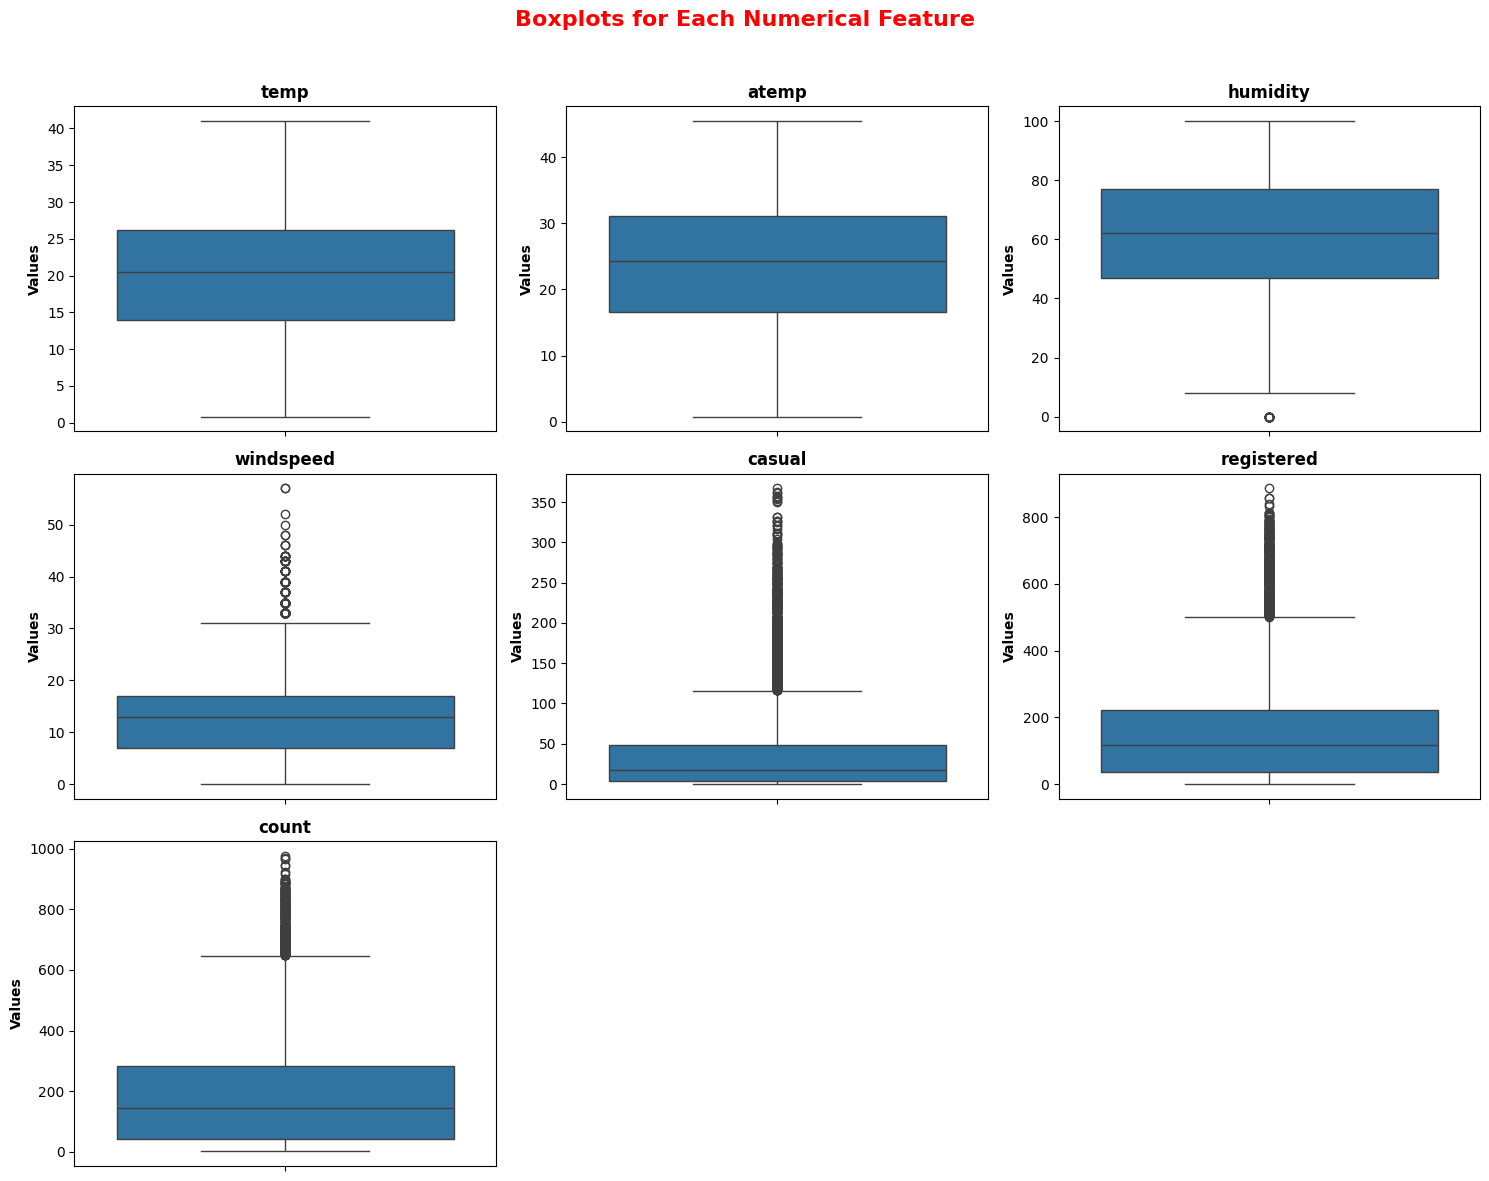

In [31]:
numerical_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

# Create a 3x3 grid to fit all the boxplots
fig, axis = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 12))
axis = axis.flatten()

# Boxplot for each feature
for index in range(len(numerical_cols)):
    sns.boxplot(y = df[numerical_cols[index]], ax = axis[index])
    axis[index].set_title(numerical_cols[index], fontweight = "bold", fontsize = 12)  # Individual subplot title
    axis[index].set_ylabel('Values', fontweight = "bold", fontsize = 10)  # y-label for each boxplot

# Remove the unused grid spots in the subplot (8th and 9th grid spots)
for i in range(len(numerical_cols), len(axis)):
    fig.delaxes(axis[i])

# Add super title
fig.suptitle('Boxplots for Each Numerical Feature', fontweight = "bold", fontsize = 16, color = 'red')

plt.tight_layout(rect = [0, 0, 1, 0.96])  # Adjust layout to make room for suptitle
plt.grid(False)
plt.show()

### **Features such as temp, atemp, humidity and windspeed have very little to no outlier values while the remaining numerical features of bike rental counts have outlier values.**

In [32]:
# Outlier Treatment: To remove the top 5% & bottom 1% of the outliers in the dataframe

q1 = np.percentile(df['count'], 25)
q3 = np.percentile(df['count'], 75)
print(f'q1: {q1}')
print(f'q3: {q3}')

IQR= q3 - q1
print(f'IQR: {IQR}')

upper_bound = q3 + (1.5 * IQR)
lower_bound = q1 - (1.5 * IQR)

print(f'Upper Bound = {upper_bound}')
print(f'Lower Bound = {lower_bound}')
print('Median =', df['count'].median())
print("Percentage of values exhibiting outlier behaviour: ", round((len(df.loc[df['count'] > upper_bound])/ len(df)) * 100,2))

q1: 42.0
q3: 284.0
IQR: 242.0
Upper Bound = 647.0
Lower Bound = -321.0
Median = 145.0
Percentage of values exhibiting outlier behaviour:  2.76


### **The percentage of values exhibiting outlier behaviour is around 3%. It is suggested not to remove the outliers as this could affect any further analysis to be conducted.**

# **Part C: Univariate and Bivariate Analysis:**

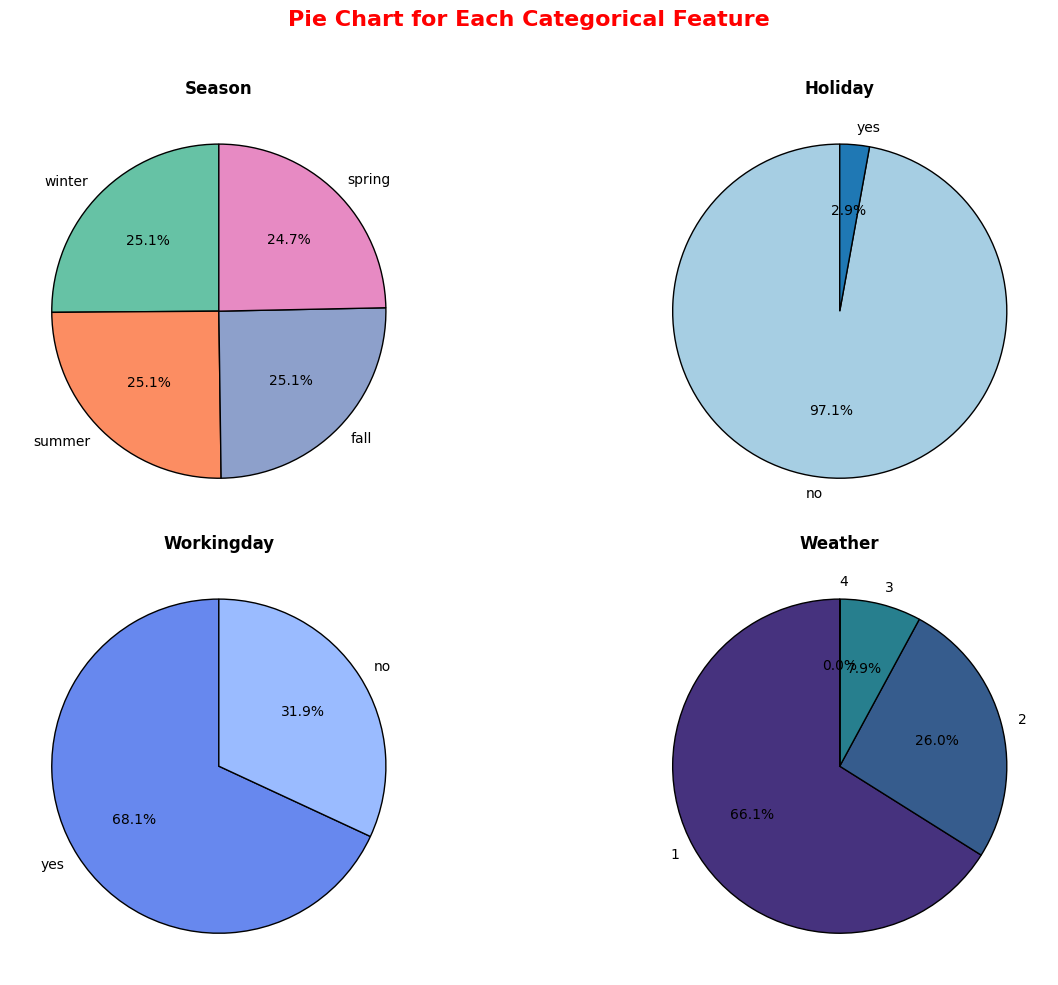

In [33]:
categorical_cols = ['season', 'holiday', 'workingday', 'weather']

# Create a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize = (14, 10))
axes = axes.flatten()

# Define color palettes for each plot
palettes = ['Set2', 'Paired', 'coolwarm', 'viridis']

# Loop through each categorical column
for i, col in enumerate(categorical_cols):
    df[col].value_counts().plot.pie(
        ax = axes[i],
        autopct = '%1.1f%%',
        startangle = 90,
        colors = sns.color_palette(palettes[i]),
        wedgeprops = {'edgecolor': 'black'}
    )
    axes[i].set_title(f'{col.capitalize()}', fontsize = 12, fontweight = 'bold')
    axes[i].set_ylabel('')  # remove redundant ylabel

# Add super title
fig.suptitle('Pie Chart for Each Categorical Feature', fontsize = 16, fontweight = 'bold', color = 'red')

plt.tight_layout(rect = [0, 0, 1, 0.96])
plt.grid(False)
plt.show()

### **This figure shows pie charts summarizing categorical features — Season, Holiday, Workingday, and Weather — highlighting that most days are working (68%), non-holiday (97%), and have clear weather (66%), with seasons nearly evenly distributed.**

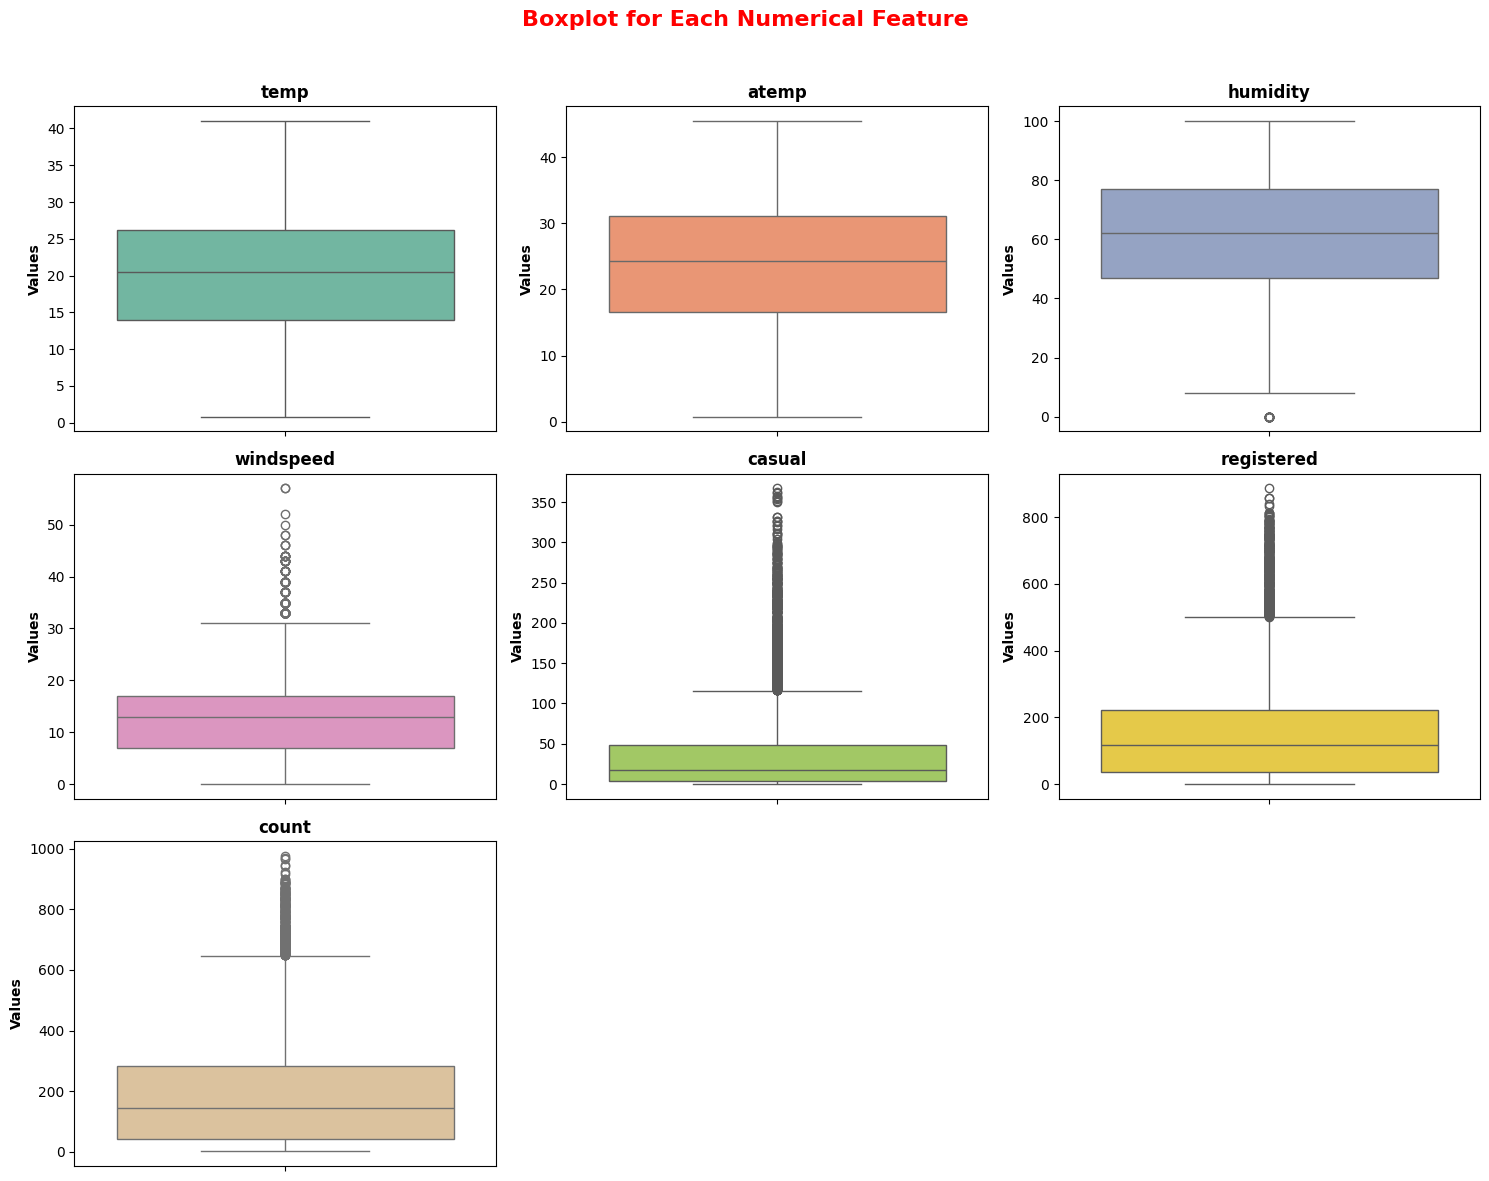

In [34]:
numerical_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

# Create a 3x3 grid
fig, axis = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 12))
axis = axis.flatten()

# Define a list of color palettes for each plot
colors = sns.color_palette('Set2', len(numerical_cols))

# Boxplot for each feature
for index in range(len(numerical_cols)):
    sns.boxplot(y = df[numerical_cols[index]], ax = axis[index], color = colors[index])
    axis[index].set_title(numerical_cols[index], fontweight = "bold", fontsize = 12)  # Individual subplot title
    axis[index].set_ylabel('Values', fontweight = "bold", fontsize = 10)  # y-label for each boxplot

# Remove the unused grid spots in the subplot (8th and 9th grid spots)
for i in range(len(numerical_cols), len(axis)):
    fig.delaxes(axis[i])

# Add super title
fig.suptitle('Boxplot for Each Numerical Feature', fontweight = "bold", fontsize = 16, color = 'red')

plt.tight_layout(rect = [0, 0, 1, 0.96])  # Adjust layout to make room for suptitle
plt.grid(False)
plt.show()

### **Features such as temp, atemp, humidity and windspeed have very little to no outlier values while the remaining numerical features of bike rental counts have outlier values.**

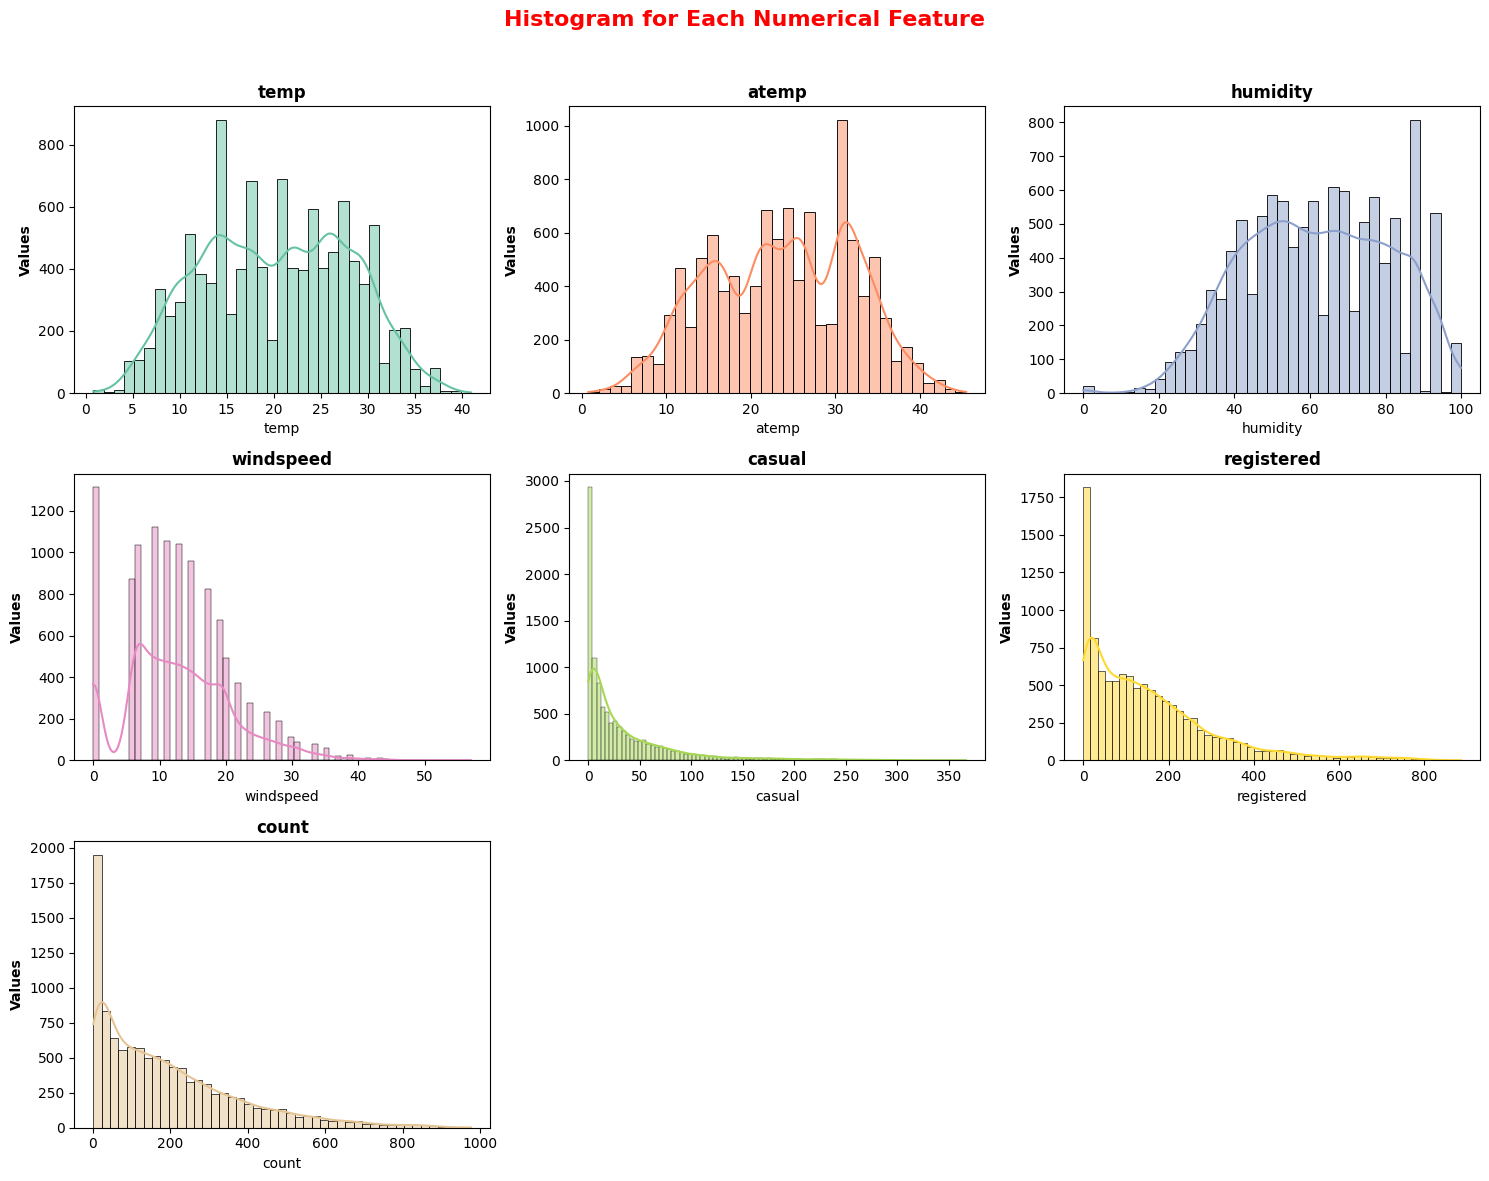

In [35]:
numerical_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

# Create a 3x3 grid
fig, axis = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 12))
axis = axis.flatten()

# Define a list of color palettes for each plot
colors = sns.color_palette('Set2', len(numerical_cols))

# Histplot for each feature
for index in range(len(numerical_cols)):
    sns.histplot(df[numerical_cols[index]], ax = axis[index], kde = True, color = colors[index])
    axis[index].set_title(numerical_cols[index], fontweight = "bold", fontsize = 12)  # Individual subplot title
    axis[index].set_ylabel('Values', fontweight = "bold", fontsize = 10)  # y-label for each boxplot

# Remove the unused grid spots in the subplot (8th and 9th grid spots)
for i in range(len(numerical_cols), len(axis)):
    fig.delaxes(axis[i])

# Add super title
fig.suptitle('Histogram for Each Numerical Feature', fontweight = "bold", fontsize = 16, color = 'red')

plt.tight_layout(rect = [0, 0, 1, 0.96])  # Adjust layout to make room for suptitle
plt.grid(False)
plt.show()

### **The histograms show that temperature, humidity, and windspeed have a roughly normal distribution, while casual, registered, and count users exhibit a right skewed distribution with a long tail.**

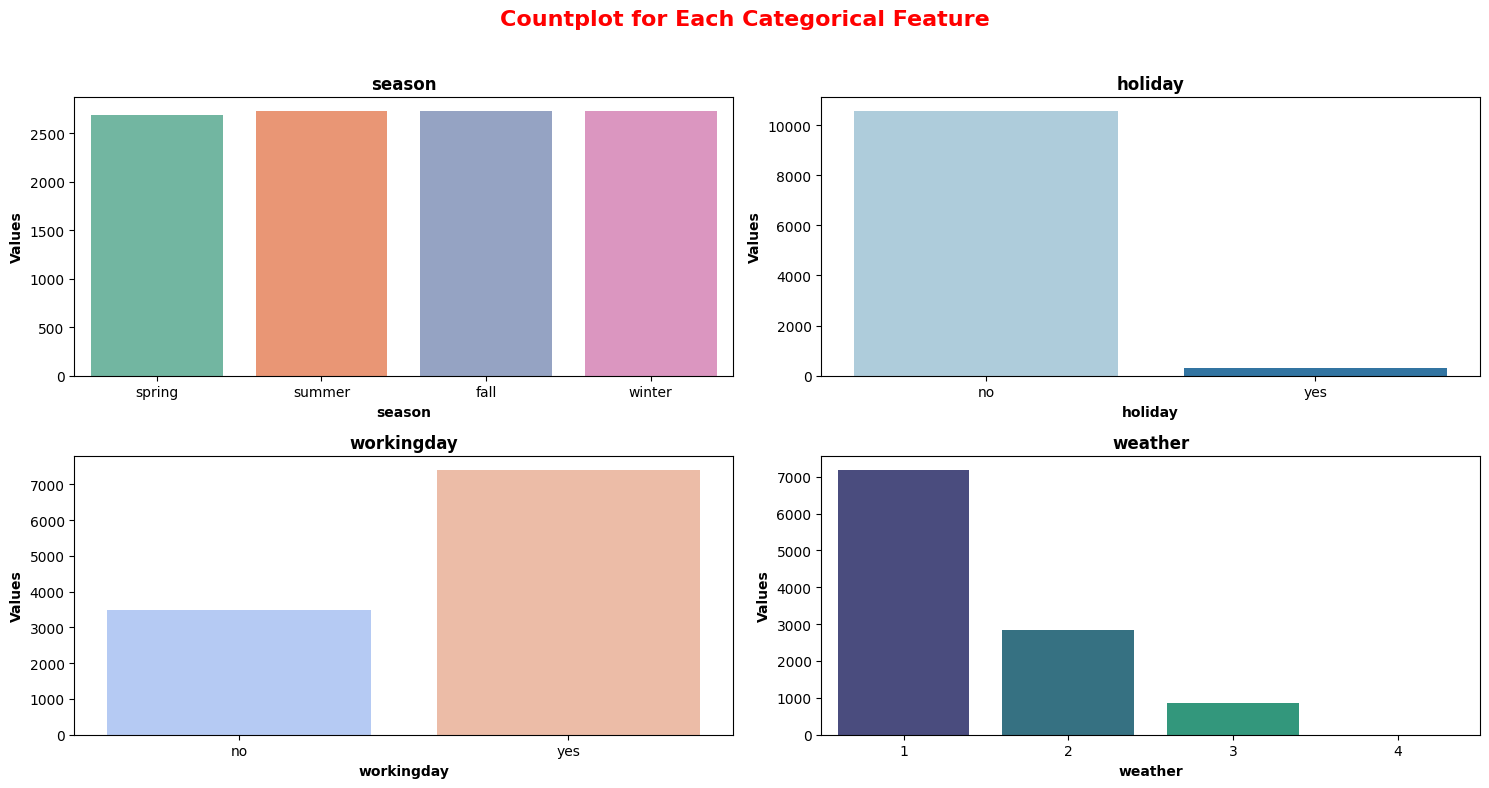

In [36]:
categorical_cols = ['season', 'holiday', 'workingday', 'weather']

# Create a 3x3 grid
fig,axis = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 8))
axis = axis.flatten()

# Define a list of color palettes for each plot
palettes = ['Set2', 'Paired', 'coolwarm', 'viridis']

# Countplot for each feature
for index in range(len(categorical_cols)):
  sns.countplot(x = df[categorical_cols[index]], ax = axis[index], palette = palettes[index])
  axis[index].set_title(categorical_cols[index], fontweight = "bold", fontsize = 12)
  axis[index].set_xlabel(categorical_cols[index], fontweight = "bold", fontsize = 10)
  axis[index].set_ylabel('Values', fontweight = "bold", fontsize = 10)

# Add super title
fig.suptitle('Countplot for Each Categorical Feature', fontweight = "bold", fontsize = 16, color = 'red')

plt.tight_layout(rect = [0, 0, 1, 0.96])  # Adjust layout to make room for suptitle
plt.grid(False)
plt.show()

### **The countplots show a nearly uniform distribution across seasons, while holidays are rare, most days are working days, and weather is predominantly category 1 (clear), decreasing in frequency for worse conditions.**

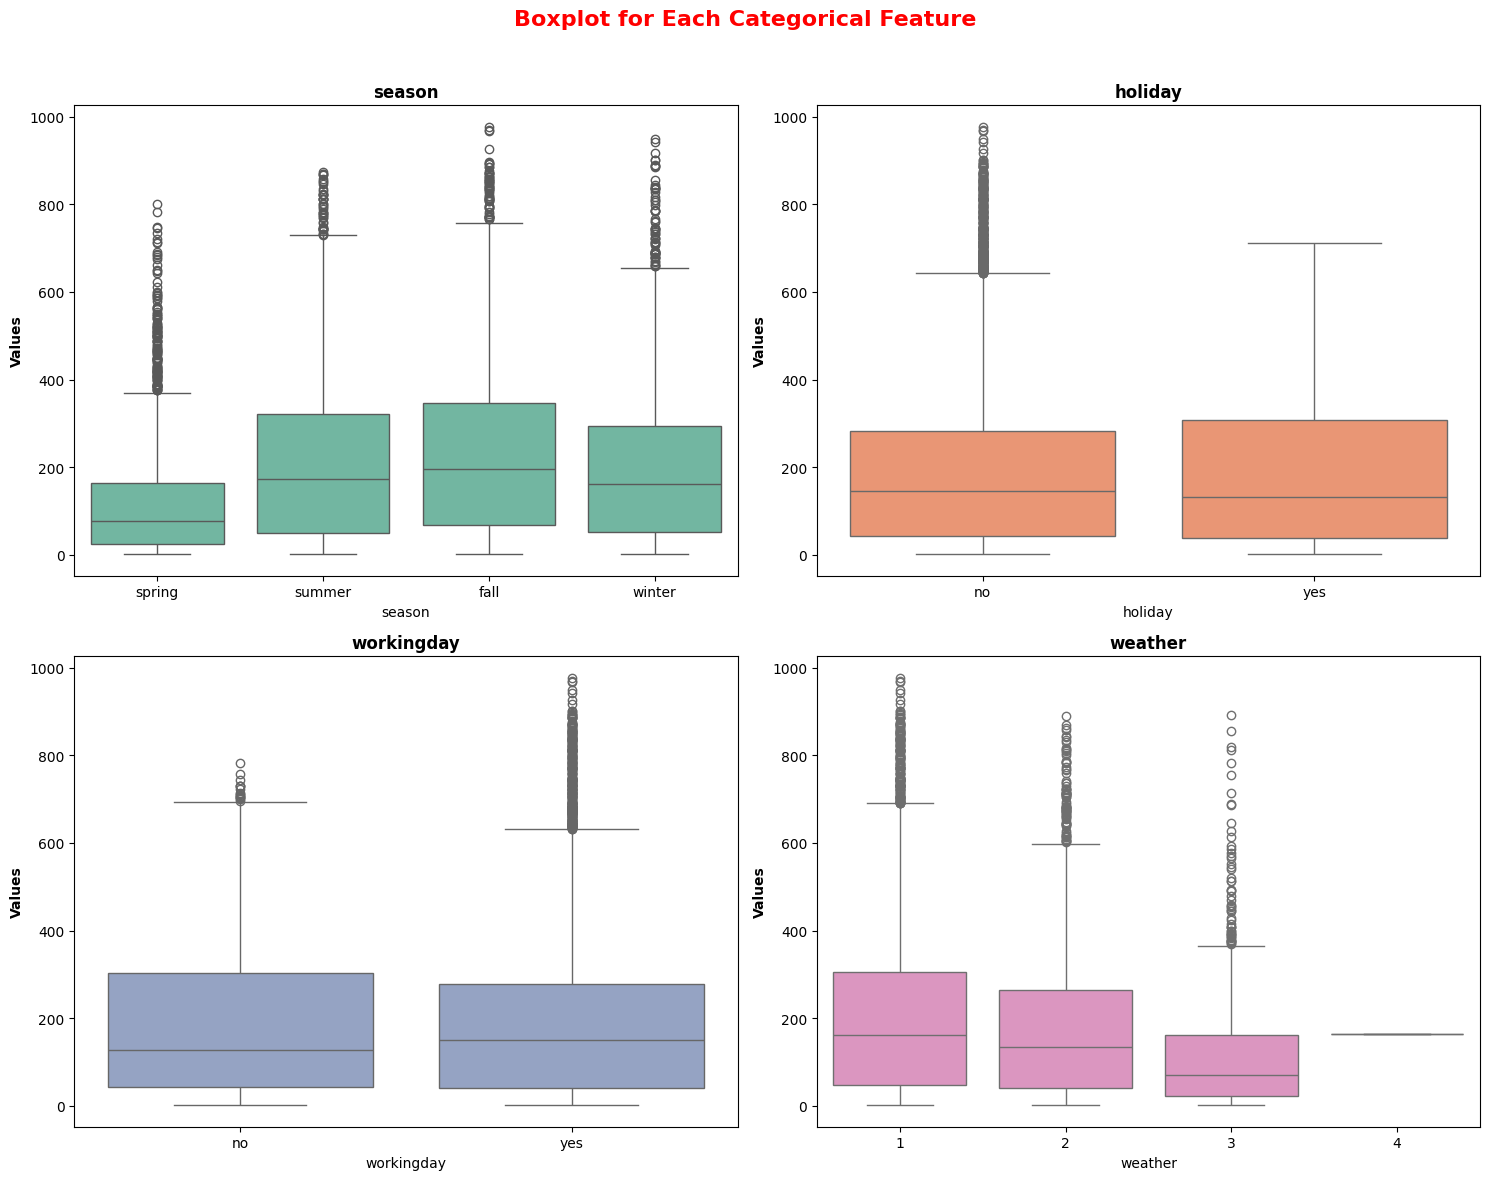

In [37]:
# Bi-variate analysis of Categories vs Count
categorical_cols = ['season', 'holiday', 'workingday', 'weather']

# Create a 3x3 grid
fig, axis = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 12))
axis = axis.flatten()

# Define a list of color palettes for each plot
colors = sns.color_palette('Set2', len(categorical_cols))

# Boxplot for each feature
for index in range(len(categorical_cols)):
    sns.boxplot(data = df, x = df[categorical_cols[index]], y = df['count'], ax = axis[index], color = colors[index])
    axis[index].set_title(categorical_cols[index], fontweight = "bold", fontsize = 12)  # Individual subplot title
    axis[index].set_ylabel('Values', fontweight = "bold", fontsize = 10)  # y-label for each boxplot

# Add super title
fig.suptitle('Boxplot for Each Categorical Feature', fontweight = "bold", fontsize = 16, color = 'red')

plt.tight_layout(rect = [0, 0, 1, 0.96])  # Adjust layout to make room for suptitle
plt.grid(False)
plt.show()

### **The boxplots reveal that bike rental counts are highest in summer and fall, on non-working days, non-holidays, and clear weather (category 1), with lower medians in spring, winter, working days, holidays, and worsening weather, alongside many outliers indicating variability.**

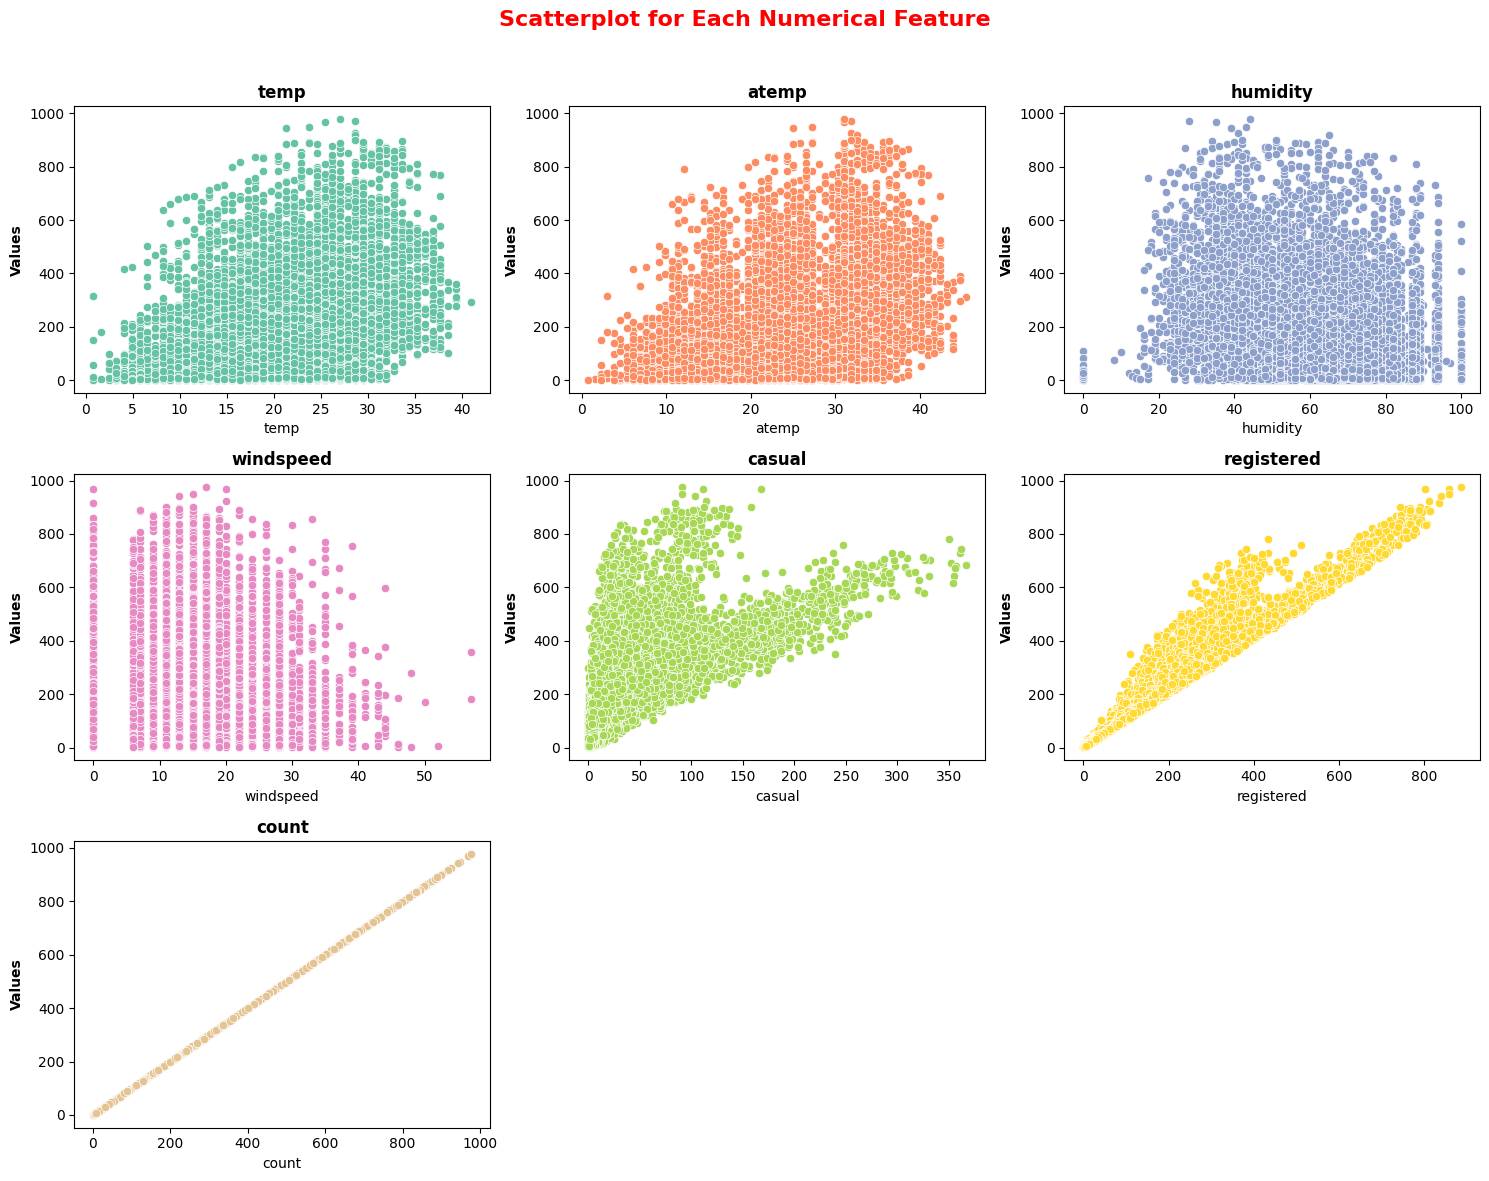

In [38]:
# Bi-variate analysis of Numericals vs Count
numerical_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

# Create a 3x3 grid
fig, axis = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 12))
axis = axis.flatten()

# Define a list of color palettes for each plot
colors = sns.color_palette('Set2', len(numerical_cols))

# Scatterplot for each feature
for index in range(len(numerical_cols)):
    sns.scatterplot(data = df, x = df[numerical_cols[index]], y = df['count'], ax = axis[index], color = colors[index])
    axis[index].set_title(numerical_cols[index], fontweight = "bold", fontsize = 12)  # Individual subplot title
    axis[index].set_ylabel('Values', fontweight = "bold", fontsize = 10)  # y-label for each boxplot

# Remove the unused grid spots in the subplot (8th and 9th grid spots)
for i in range(len(numerical_cols), len(axis)):
    fig.delaxes(axis[i])

# Add super title
fig.suptitle('Scatterplot for Each Numerical Feature', fontweight = "bold", fontsize = 16, color = 'red')

plt.tight_layout(rect = [0, 0, 1, 0.96])  # Adjust layout to make room for suptitle
plt.grid(False)
plt.show()

### **The scatterplots illustrate that temp and atemp are approximately normally distributed around 20-25, humidity is right-skewed peaking near 60-80, windspeed is heavily right-skewed with most values below 20, while casual, registered, and count show strong right skewness with long tails.**

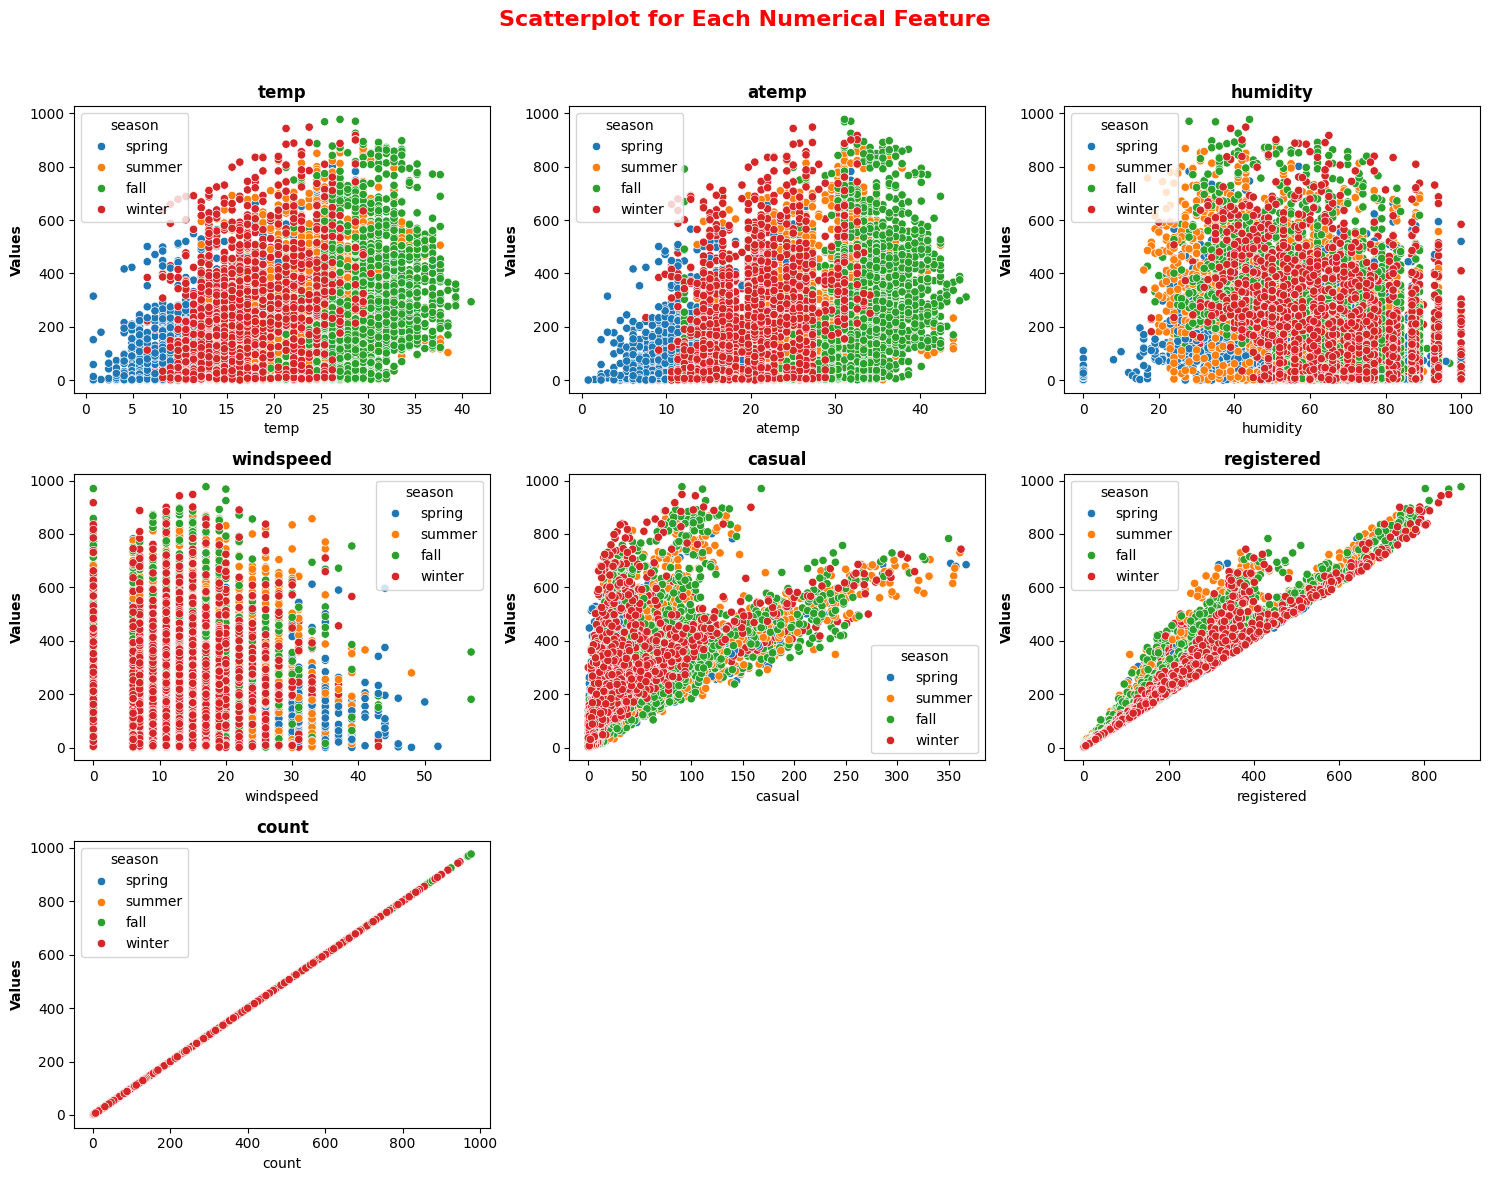

In [39]:
# Multivariate analysis of Numericals vs Count with Season as hue
numerical_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

# Create a 3x3 grid
fig, axis = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 12))
axis = axis.flatten()

# Define a list of color palettes for each plot
colors = sns.color_palette('Set2', len(numerical_cols))

# Scatterplot for each feature
for index in range(len(numerical_cols)):
    sns.scatterplot(data = df, x = df[numerical_cols[index]], y = df['count'], hue = 'season', ax = axis[index], color = colors[index])
    axis[index].set_title(numerical_cols[index], fontweight = "bold", fontsize = 12)  # Individual subplot title
    axis[index].set_ylabel('Values', fontweight = "bold", fontsize = 10)  # y-label for each boxplot

# Remove the unused grid spots in the subplot (8th and 9th grid spots)
for i in range(len(numerical_cols), len(axis)):
    fig.delaxes(axis[i])

# Add super title
fig.suptitle('Scatterplot for Each Numerical Feature', fontweight = "bold", fontsize = 16, color = 'red')

plt.tight_layout(rect = [0, 0, 1, 0.96])  # Adjust layout to make room for suptitle
plt.grid(False)
plt.show()

### **This seasonal scatterplot show that temperatures (temp and atemp) peak in summer (orange) and are lowest in winter (red), humidity and windspeed show overlapping distributions across seasons, while bike usage (casual, registered, count) is markedly higher in summer and fall (green) than in spring (blue) or winter.**

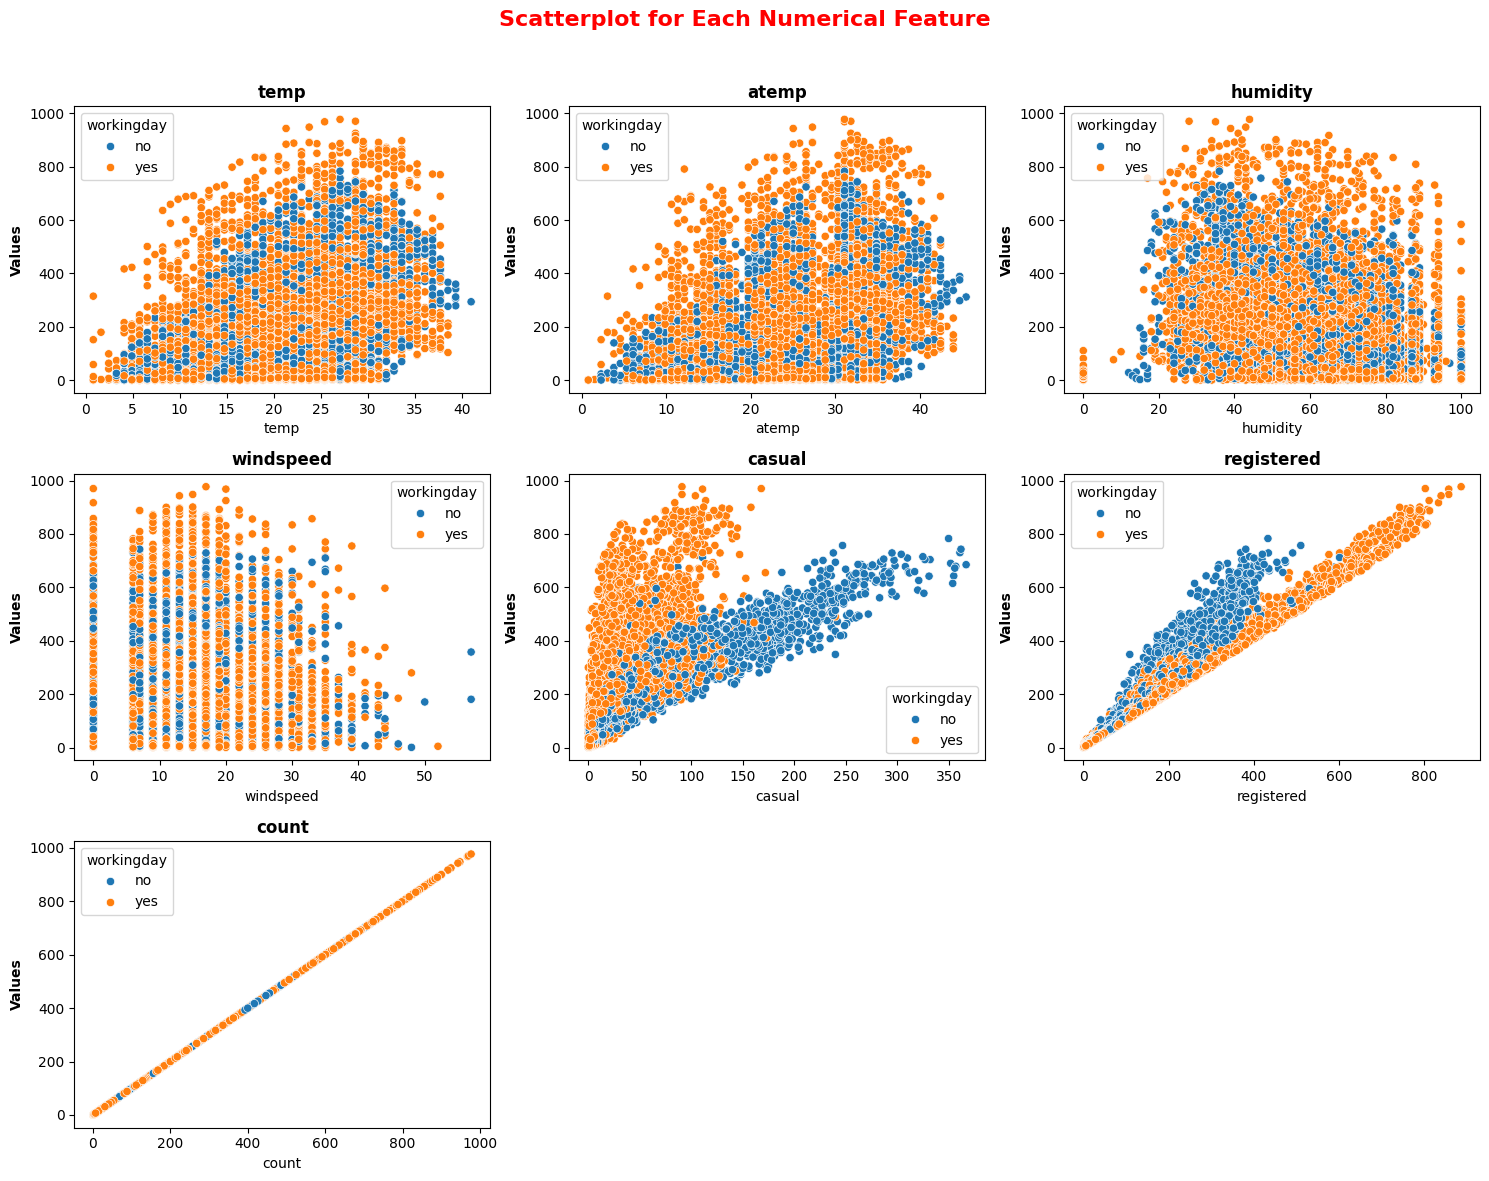

In [40]:
# Multivariate analysis of Numericals vs Count with Working Day as hue
numerical_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

# Create a 3x3 grid
fig, axis = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 12))
axis = axis.flatten()

# Define a list of color palettes for each plot
colors = sns.color_palette('Set2', len(numerical_cols))

# Scatterplot for each feature
for index in range(len(numerical_cols)):
    sns.scatterplot(data = df, x = df[numerical_cols[index]], y = df['count'], hue = 'workingday', ax = axis[index], color = colors[index])
    axis[index].set_title(numerical_cols[index], fontweight = "bold", fontsize = 12)  # Individual subplot title
    axis[index].set_ylabel('Values', fontweight = "bold", fontsize = 10)  # y-label for each boxplot

# Remove the unused grid spots in the subplot (8th and 9th grid spots)
for i in range(len(numerical_cols), len(axis)):
    fig.delaxes(axis[i])

# Add super title
fig.suptitle('Scatterplot for Each Numerical Feature', fontweight = "bold", fontsize = 16, color = 'red')

plt.tight_layout(rect = [0, 0, 1, 0.96])  # Adjust layout to make room for suptitle
plt.grid(False)
plt.show()

### **This scatterplot by workingday indicate similar distributions for temp, atemp, humidity, and windspeed, but casual rentals are significantly higher on non-working days (blue), registered rentals on working days (orange), resulting in total counts (count) being higher overall on working days with less variance.**

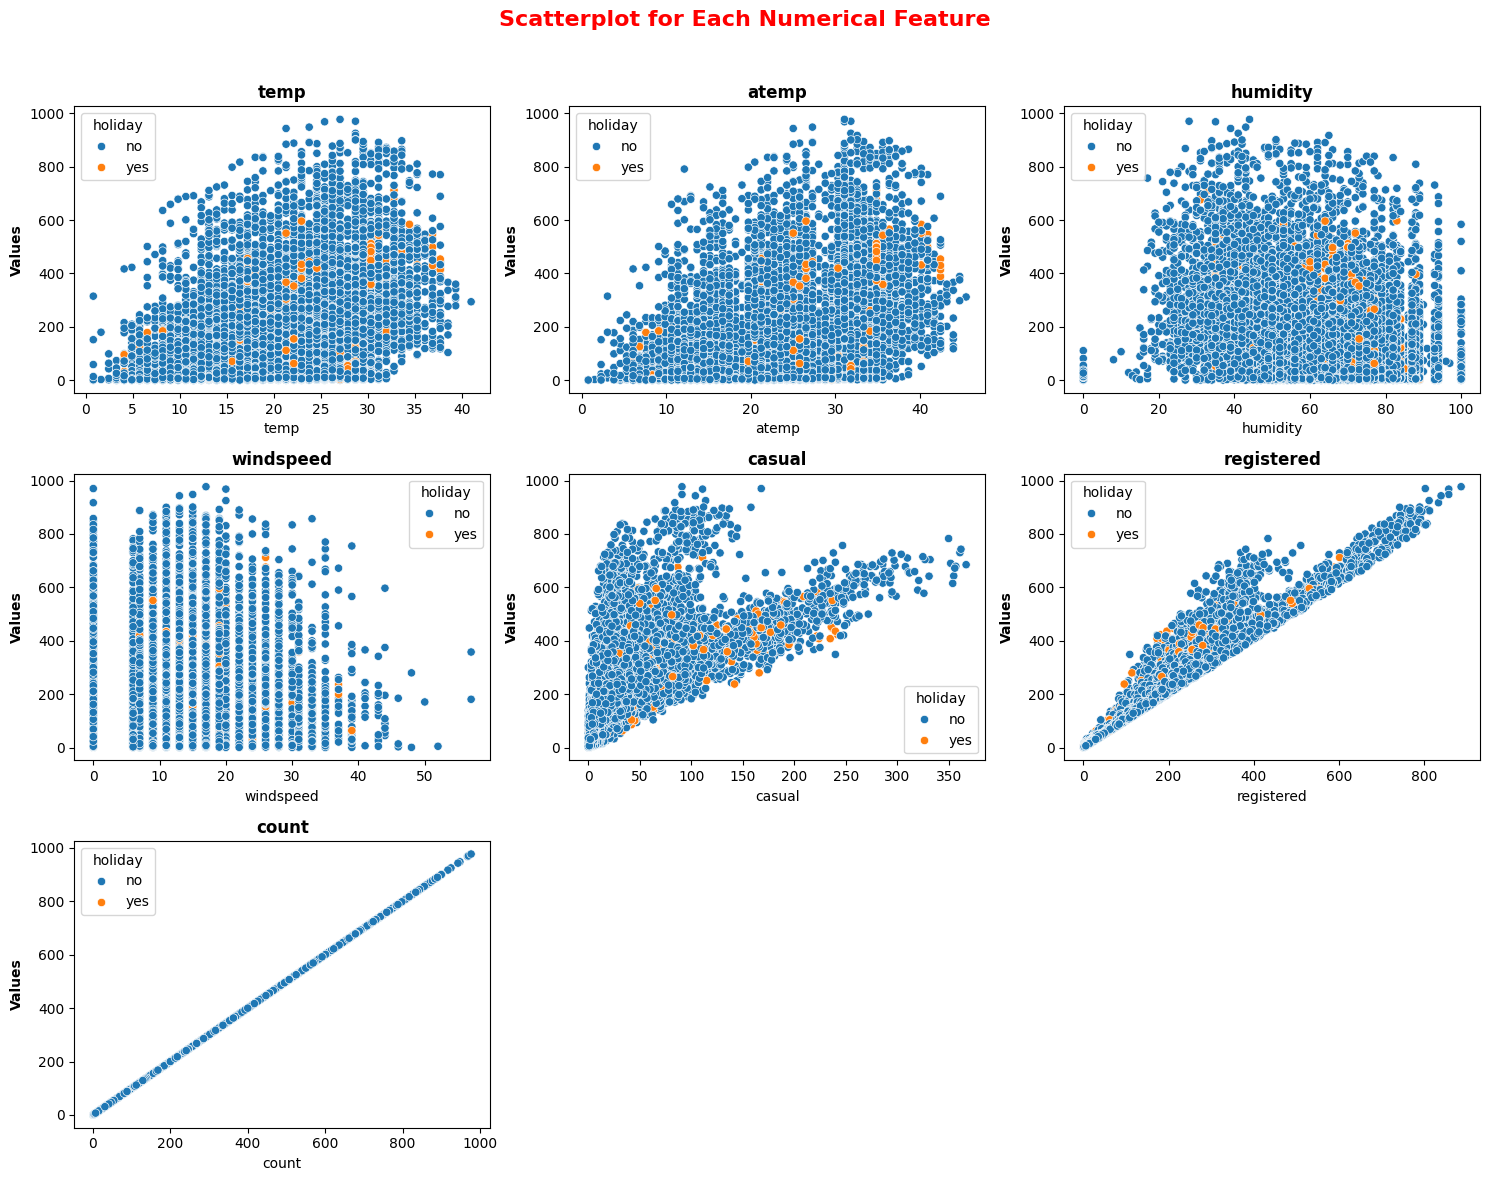

In [41]:
# Multivariate analysis of Numericals vs Count with Holiday as hue
numerical_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

# Create a 3x3 grid
fig, axis = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 12))
axis = axis.flatten()

# Define a list of color palettes for each plot
colors = sns.color_palette('Set2', len(numerical_cols))

# Scatterplot for each feature
for index in range(len(numerical_cols)):
    sns.scatterplot(data = df, x = df[numerical_cols[index]], y = df['count'], hue = 'holiday', ax = axis[index], color = colors[index])
    axis[index].set_title(numerical_cols[index], fontweight = "bold", fontsize = 12)  # Individual subplot title
    axis[index].set_ylabel('Values', fontweight = "bold", fontsize = 10)  # y-label for each boxplot

# Remove the unused grid spots in the subplot (8th and 9th grid spots)
for i in range(len(numerical_cols), len(axis)):
    fig.delaxes(axis[i])

# Add super title
fig.suptitle('Scatterplot for Each Numerical Feature', fontweight = "bold", fontsize = 16, color = 'red')

plt.tight_layout(rect = [0, 0, 1, 0.96])  # Adjust layout to make room for suptitle
plt.grid(False)
plt.show()

### **This scatterplot by holiday show similar overlapping distributions for temp, atemp, humidity, and windspeed, but casual rentals are higher on holidays (orange), while registered and total counts (count) are generally higher on non-holidays (blue) due to the larger number of non-holiday instances.**

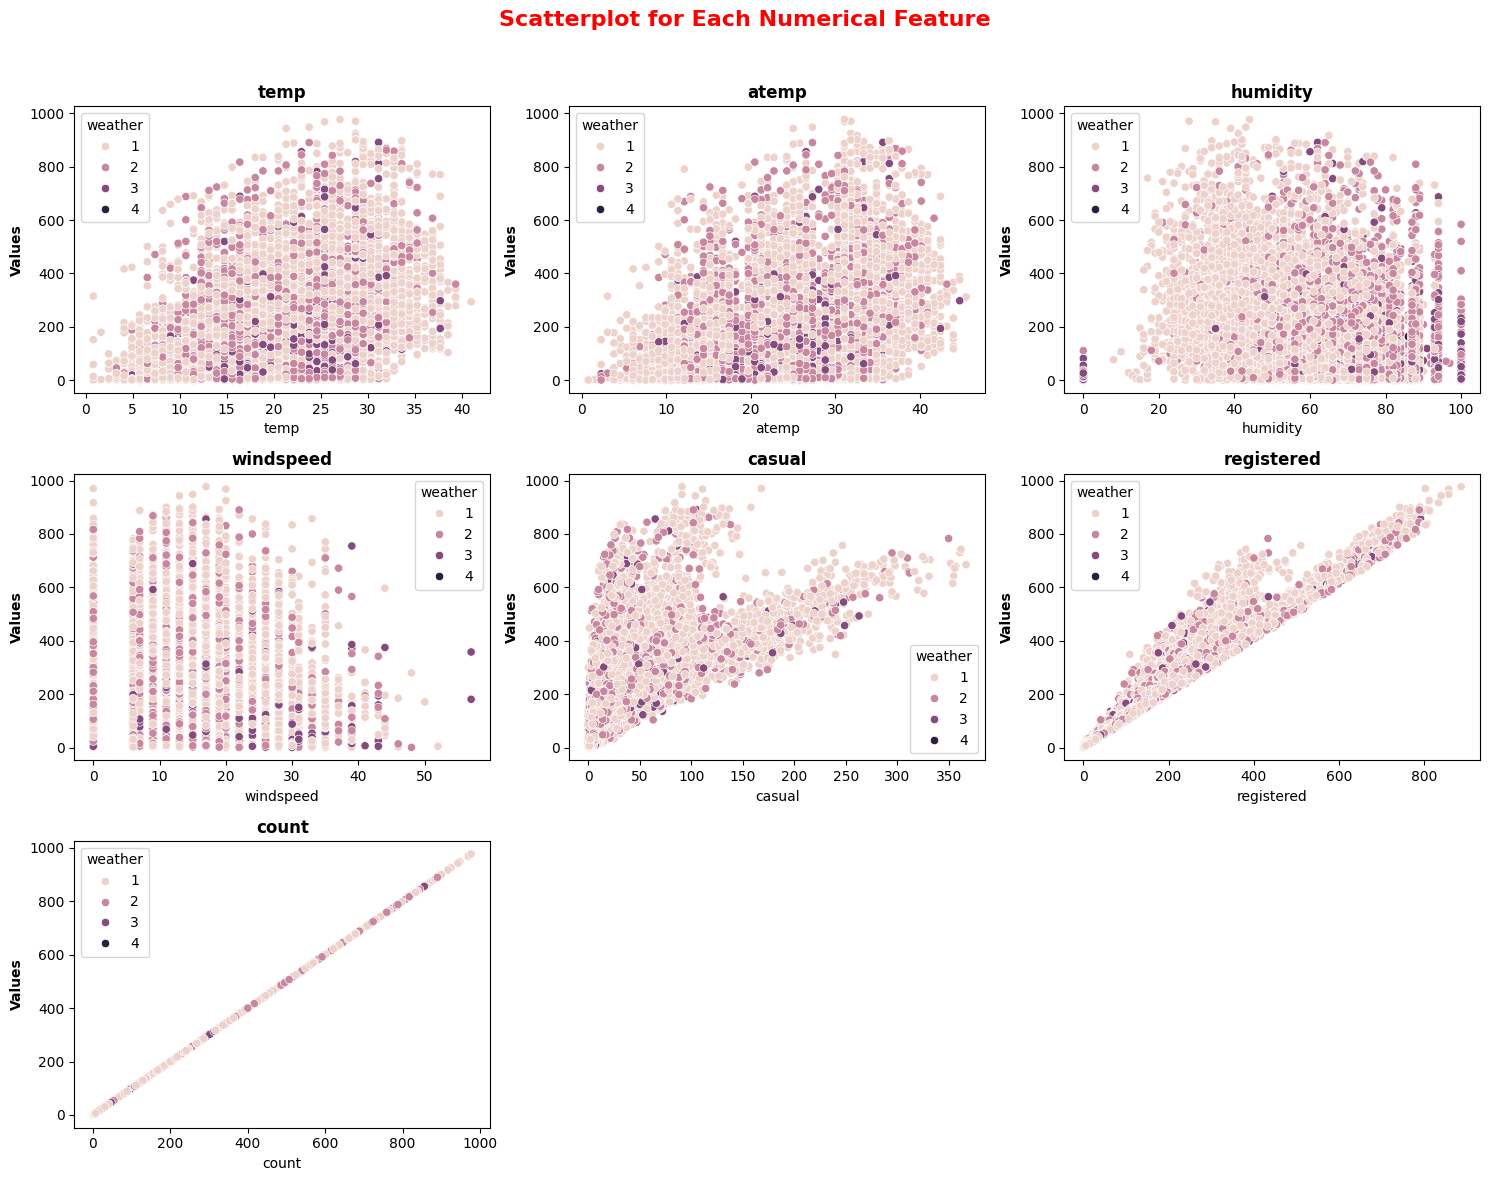

In [42]:
# Multivariate analysis of Numericals vs Count with Weather as hue
numerical_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

# Create a 3x3 grid
fig, axis = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 12))
axis = axis.flatten()

# Define a list of color palettes for each plot
colors = sns.color_palette('viridis', len(numerical_cols))

# Scatterplot for each feature
for index in range(len(numerical_cols)):
    sns.scatterplot(data = df, x = df[numerical_cols[index]], y = df['count'], hue = 'weather', ax = axis[index], color = colors[index])
    axis[index].set_title(numerical_cols[index], fontweight = "bold", fontsize = 12)  # Individual subplot title
    axis[index].set_ylabel('Values', fontweight = "bold", fontsize = 10)  # y-label for each boxplot

# Remove the unused grid spots in the subplot (8th and 9th grid spots)
for i in range(len(numerical_cols), len(axis)):
    fig.delaxes(axis[i])

# Add super title
fig.suptitle('Scatterplot for Each Numerical Feature', fontweight = "bold", fontsize = 16, color = 'red')

plt.tight_layout(rect = [0, 0, 1, 0.96])  # Adjust layout to make room for suptitle
plt.grid(False)
plt.show()

### **This scatterplot by weather category show that temperatures (temp, atemp) and humidity/windspeed distributions overlap but with worse weather (darker shades, 3-4) more prevalent at lower temps, higher humidity, and higher winds; bike rentals (casual, registered, count) are predominantly higher in better weather (lighter shade, 1), decreasing in poorer conditions.**

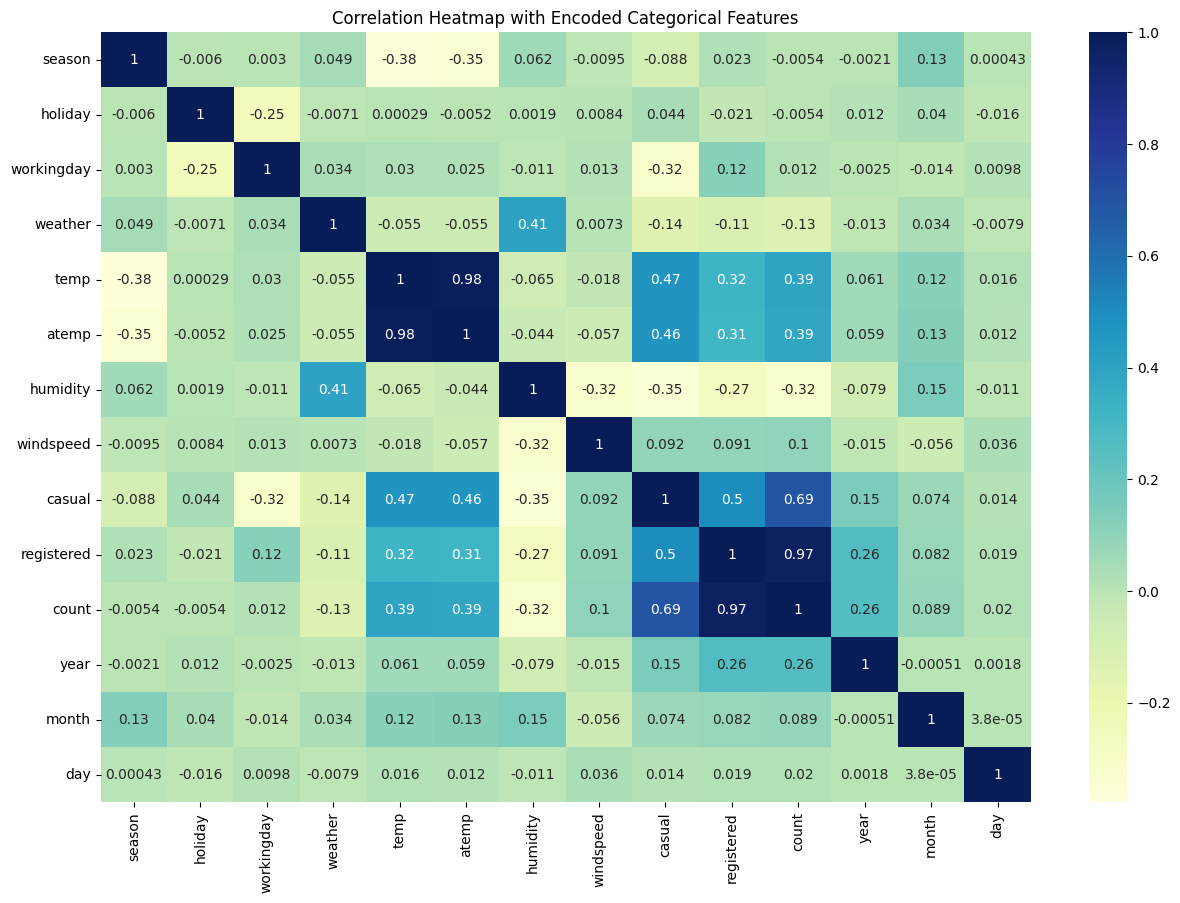

In [43]:
# Heatmap of the dataset
from sklearn.preprocessing import LabelEncoder

plt.figure(figsize = (15, 10))

df_encoded = df.copy()
for col in df_encoded.select_dtypes(include = 'object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

sns.heatmap(df_encoded.corr(), annot = True, cmap='YlGnBu')
plt.title('Correlation Heatmap with Encoded Categorical Features')
plt.show()

### **The correlation heatmap reveals strong positive correlations between temp and atemp (0.98), registered and count (0.97), casual and count (0.69), and casual and registered (0.5), while humidity shows moderate negative correlations with usage metrics (-0.27 to -0.35), and workingday is negatively correlated with casual users (-0.32) but slightly positive with registered (0.12).**

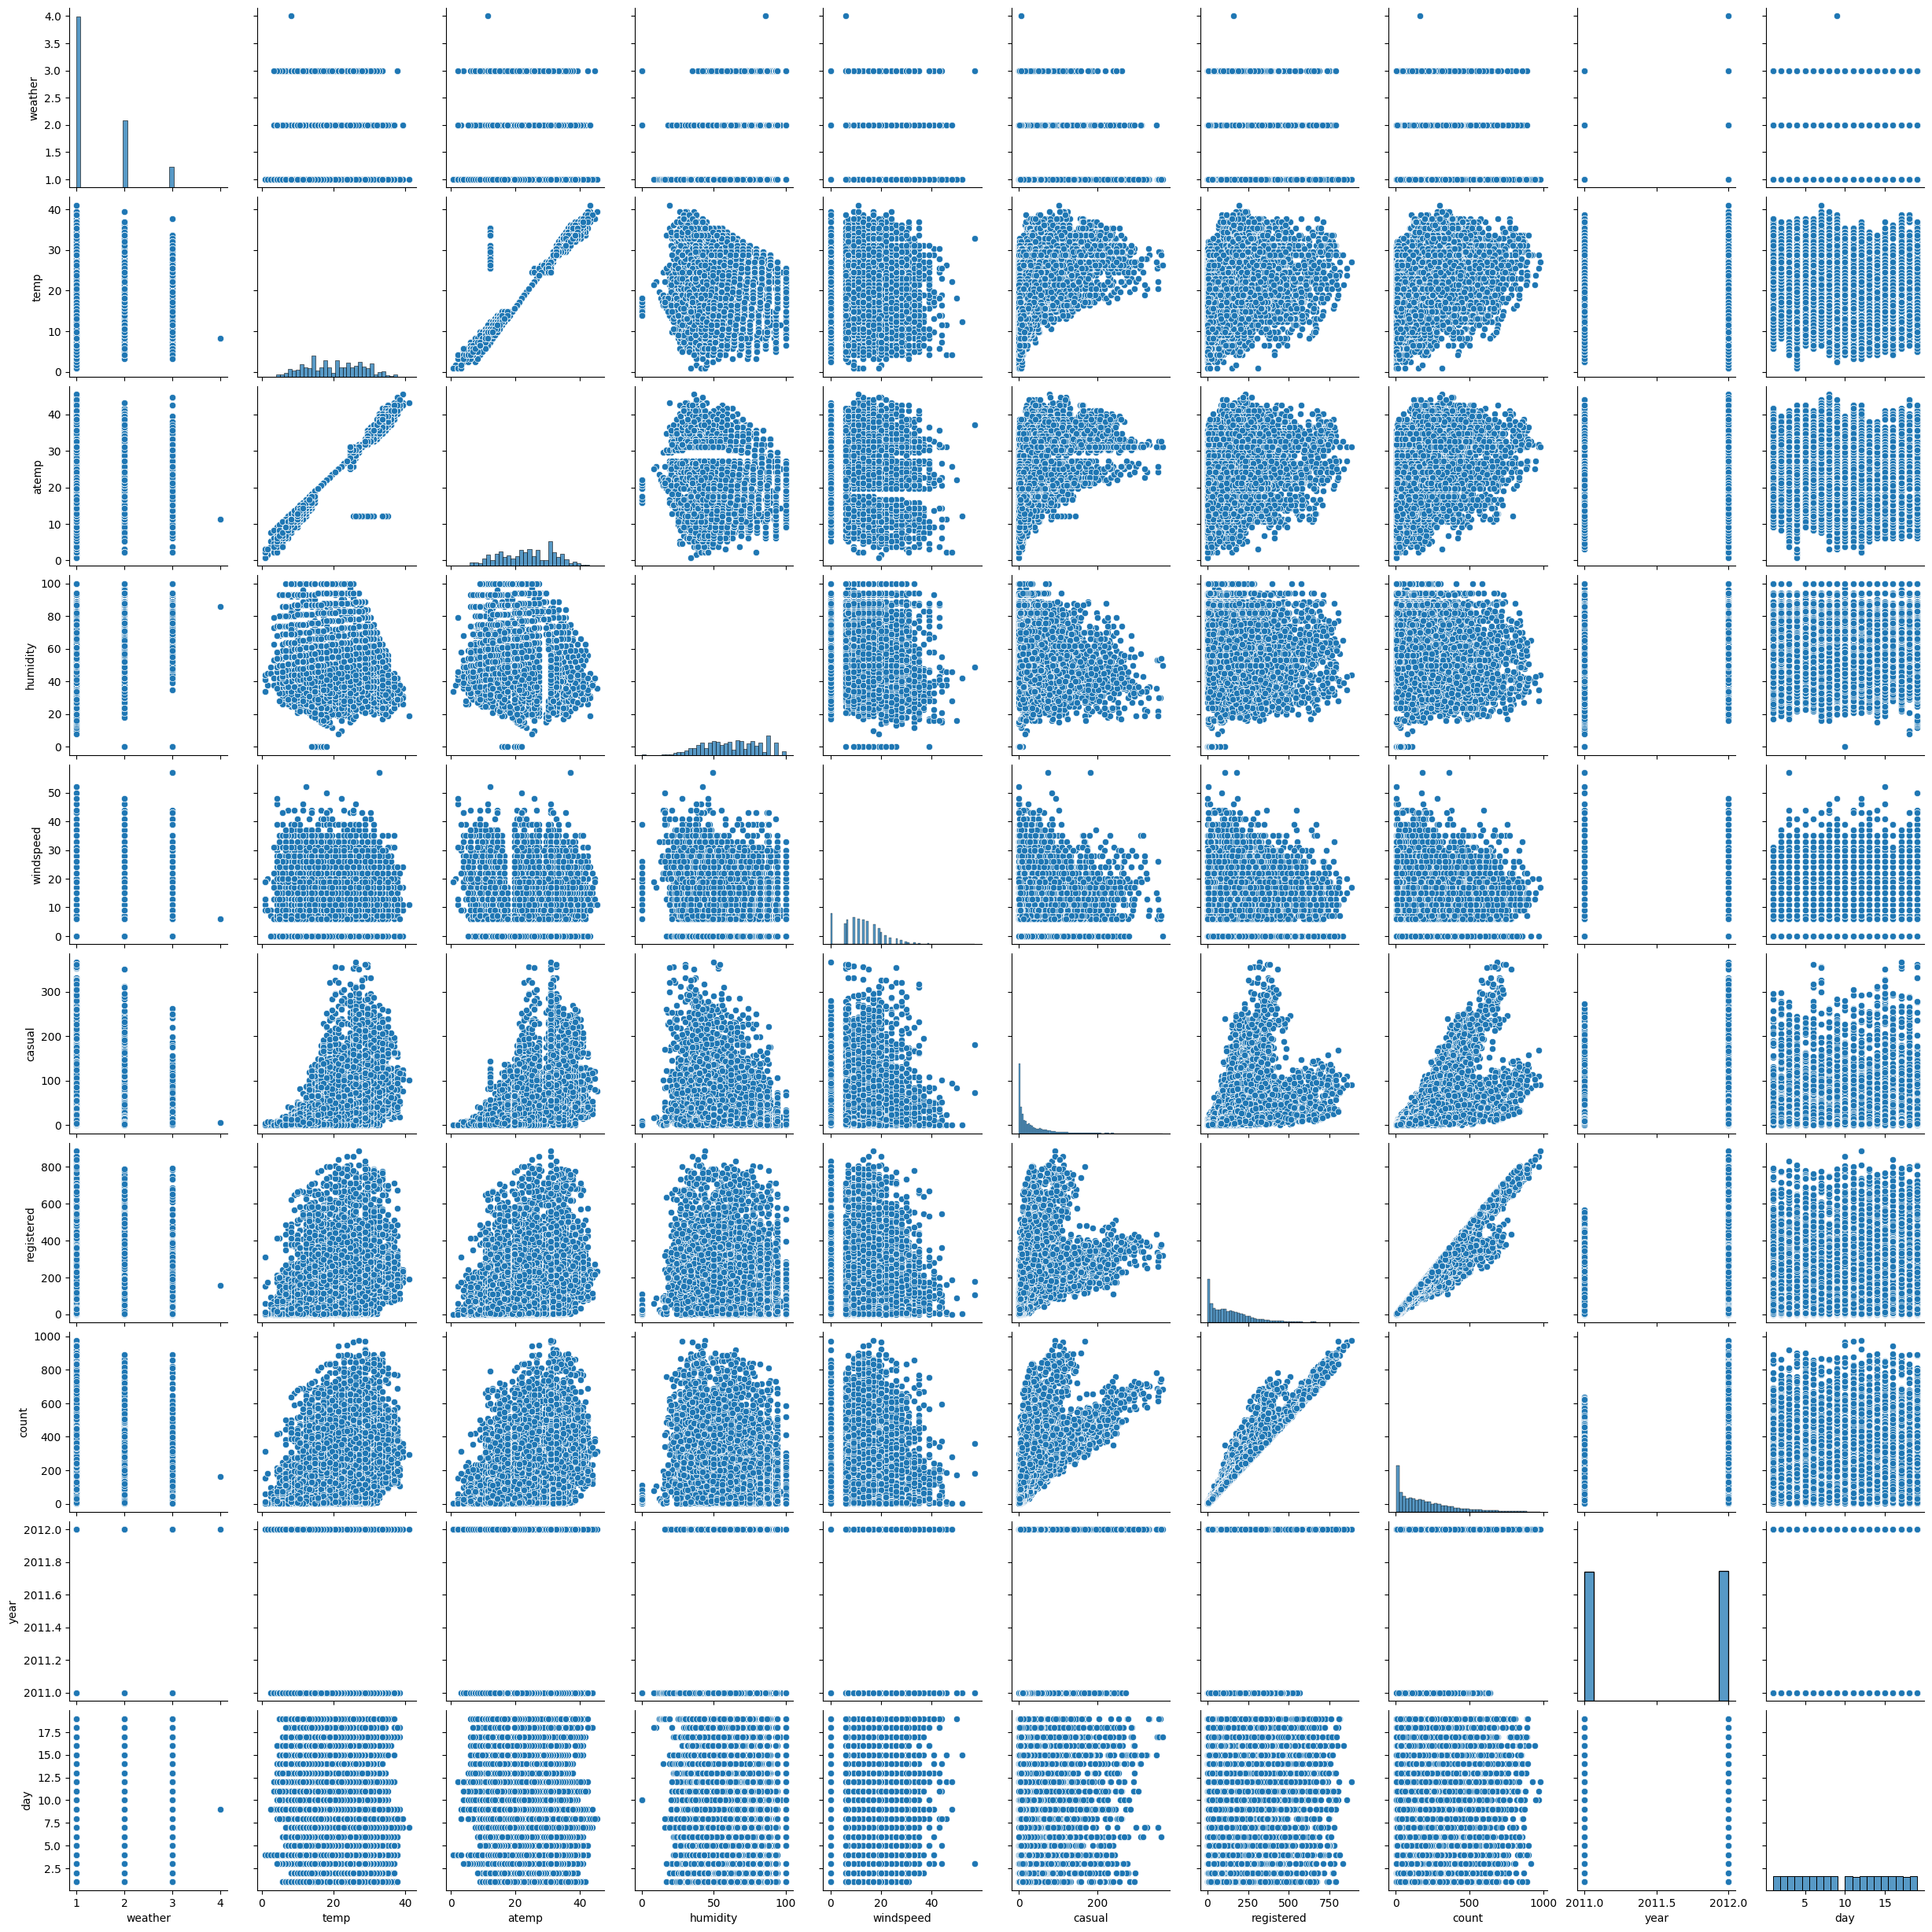

In [44]:
# Pairplot of the dataset
sns.pairplot(df)
plt.show()

# **Part D: Hypothesis Testing**

# **Part D1: Hypothesis Test 1:- Working Day has effect on number of electric cycles rented.**

##  Ho (Null Hypothesis): Working day has no effect on the number of cycles being rented

## Ha (Alternate Hypothesis): Working day has effect on the number of cycles being rented

## Alpha (Significance level) : 0.05

## Test used: 2-Sample T-Test

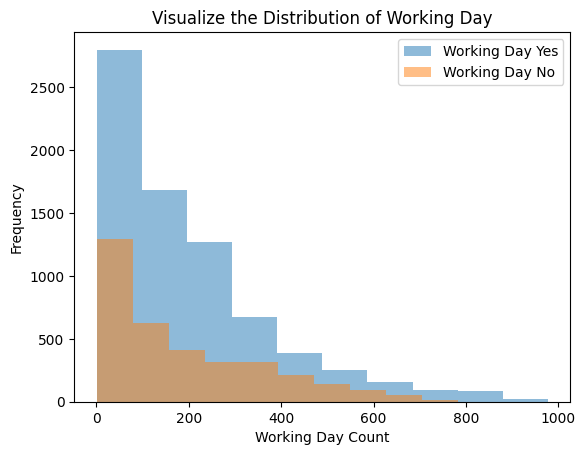

Shapiro-Wilk Test for Working Day Yes:
shapiro_stat_yes:  0.8702545795617624
p_value_yes:  2.2521124830019574e-61


Shapiro-Wilk Test for Working Day No:
shapiro_stat_no:  0.885211755076074
p_value_no:  4.4728547627911074e-45


The data for working day yes is not normally distributed.


The data for working day no is not normally distributed.


Levene Test:
levene_stat:  0.004972848886504472
p_value_levene:  0.9437823280916695


T-Test:
t-test_stat:  1.2096277376026694
p_value_ttest:  0.22644804226361348
Failed to reject the null hypothesis. Working day has no effect on the number of cycles being rented.


In [45]:
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import ttest_ind

working_day_yes = df[df['workingday'] == 'yes']['count']
working_day_no = df[df['workingday'] == 'no']['count']

# Plot Histograms
plt.hist(working_day_yes, alpha = 0.5, label = 'Working Day Yes')
plt.hist(working_day_no, alpha = 0.5, label = 'Working Day No')
plt.title('Visualize the Distribution of Working Day')
plt.xlabel('Working Day Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Normality Test: Shapiro-Wilk Test
shapiro_stat_yes, p_value_yes = shapiro(working_day_yes)
print('Shapiro-Wilk Test for Working Day Yes:')
print("shapiro_stat_yes: ", shapiro_stat_yes)
print("p_value_yes: ", p_value_yes)
print("\n")

shapiro_stat_no, p_value_no = shapiro(working_day_no)
print('Shapiro-Wilk Test for Working Day No:')
print("shapiro_stat_no: ", shapiro_stat_no)
print("p_value_no: ", p_value_no)
print("\n")

if p_value_yes > 0.05:
    print("The data for working day yes is normally distributed.")
    print("\n")
else:
    print("The data for working day yes is not normally distributed.")
    print("\n")

if p_value_no > 0.05:
    print("The data for working day no is normally distributed.")
    print("\n")
else:
    print("The data for working day no is not normally distributed.")
    print("\n")

# Variance Equality: Levene's Test
levene_stat, p_value_levene = levene(working_day_yes, working_day_no)
print('Levene Test:')
print("levene_stat: ", levene_stat)
print("p_value_levene: ", p_value_levene)
print("\n")

# 2-Sample T-Test
ttest_stat, p_value_ttest = ttest_ind(working_day_yes, working_day_no, equal_var = True)
print('T-Test:')
print("t-test_stat: ", ttest_stat)
print("p_value_ttest: ", p_value_ttest)

alpha = 0.05

if p_value_ttest < alpha:
    print("Reject the null hypothesis. Working day has effect on the number of cycles being rented.")
else:
    print("Failed to reject the null hypothesis. Working day has no effect on the number of cycles being rented.")

# **Conclusion:**
**Failed to reject the null hypothesis. Working day has no effect on the number of cycles being rented. The p_value_ttest is greater than alpha (significance level) = 0.05. Hence, we can not reject the Null Hypothesis (Ho) as we don't have sufficient evidence to say that working day has effect on the number of cycles being rented.**

# **Part D2: Hypothesis Test 2:- Weather is dependent on season (check between 2 predictor variable).**

##  Ho (Null Hypothesis): Weather is independent of the season

## Ha (Alternate Hypothesis): Weather is not independent of the season

## Alpha (Significance level) : 0.05

## Test used: Chi-Square Test

In [46]:
from scipy.stats import chi2_contingency

df1 = df[~(df["weather"] == 4)]

# Contingency Table
print("Removed the only data entry where weather = 4")
print("Shape of the old dataframe df: ", df.shape)
print("Shape of the new dataframe df1: ", df1.shape)
print("\n")
cont_table_season_weather = pd.crosstab(df1['season'], df1['weather'])
print("Contingency Table:")
print(cont_table_season_weather)
print("\n")

chi2_stat, p_value_chi2, dof_chi2, exp_val_chi2 = chi2_contingency(cont_table_season_weather)
print('Chi-Square Test:')
print("chi2_stat: ", chi2_stat)
print("p_value_chi2: ", p_value_chi2)
print("Degree of Freedom: ", dof_chi2)
print("Expected Values: ", exp_val_chi2)
print("\n")

alpha = 0.05
if p_value_chi2 < alpha:
  print("Reject null hypothesis. Weather has effect on seasons")
else:
  print("Failed to reject null hypothesis. Weather has no effect on seasons")

Removed the only data entry where weather = 4
Shape of the old dataframe df:  (10886, 14)
Shape of the new dataframe df1:  (10885, 14)


Contingency Table:
weather     1    2    3
season                 
fall     1930  604  199
spring   1759  715  211
summer   1801  708  224
winter   1702  807  225


Chi-Square Test:
chi2_stat:  46.10145731073249
p_value_chi2:  2.8260014509929343e-08
Degree of Freedom:  6
Expected Values:  [[1805.76352779  711.55920992  215.67726229]
 [1774.04869086  699.06201194  211.8892972 ]
 [1805.76352779  711.55920992  215.67726229]
 [1806.42425356  711.81956821  215.75617823]]


Reject null hypothesis. Weather has effect on seasons


# **Conclusion:**
**Reject the null hypothesis. Weather has an effect on seasons. The p_value_chi2 is less than alpha (significance level) = 0.05. Hence, we reject the Null Hypothesis (Ho) and conclude that weather has an effect on seasons for bike rentals.**

# **Part D3: Hypothesis Test 3:-**

# **No. of cycles rented similar or different in different weather.**

##  Ho (Null Hypothesis): Weather has no effect on bike rentals

## Ha (Alternate Hypothesis): Weather has effect on bike rentals

## Alpha (Significance level) : 0.05

## Test used: ANOVA Test


Bike rentals (count) is a numerical feature. Weather is a categorical feature with 4 categories. For this case, the appropriate test is the ANOVA Test because the hypothesis test to understand whether there is an effect of weather on bike rentals i.e., 1 numerical feature and 1 categorical feature with 4 categories.

Before performing the ANOVA hypothesis test, it is important to do the normality test and equal variances test.

In [47]:
from scipy.stats import shapiro
from scipy.stats import kstest

df1 = df[~(df["weather"] == 4)]
print("Removed the only data entry where weather = 4")
print("Shape of the old dataframe df: ", df.shape)
print("Shape of the new dataframe df1: ", df1.shape)
print("\n")

weather_1 = df1[df1["weather"] == 1][["count"]]
weather_2 = df1[df1["weather"] == 2][["count"]]
weather_3 = df1[df1["weather"] == 3][["count"]]

alpha = 0.05

# Normality Test: Shapiro-Wilk Test

shapiro_stat_w1, p_value_w1 = shapiro(weather_1)
print('Shapiro-Wilk Test for Weather = 1:')
print("shapiro_stat_w1: ", shapiro_stat_w1)
print("p_value_w1: ", p_value_w1)
print("\n")

shapiro_stat_w2, p_value_w2 = shapiro(weather_2)
print('Shapiro-Wilk Test for Weather = 2:')
print("shapiro_stat_w2: ", shapiro_stat_w2)
print("p_value_w2: ", p_value_w2)
print("\n")

shapiro_stat_w3, p_value_w3 = shapiro(weather_3)
print('Shapiro-Wilk Test for Weather = 3:')
print("shapiro_stat_w3: ", shapiro_stat_w3)
print("p_value_w3: ", p_value_w3)
print("\n")

print("Interpretation for Shapiro-Wilk Test:")
if p_value_w1 < alpha:
  print("Weather 1 data does not show gaussian distribution (normal distribution)")
else:
  print("Weather 1 data shows gaussian distribution (normal distribution)")

if p_value_w2 < alpha:
  print("Weather 2 data does not show gaussian distribution (normal distribution)")
else:
  print("Weather 2 data shows gaussian distribution (normal distribution)")

if p_value_w3 < alpha:
  print("Weather 3 data does not show gaussian distribution (normal distribution)")
else:
  print("Weather 3 data shows gaussian distribution (normal distribution)")

Removed the only data entry where weather = 4
Shape of the old dataframe df:  (10886, 14)
Shape of the new dataframe df1:  (10885, 14)


Shapiro-Wilk Test for Weather = 1:
shapiro_stat_w1:  0.8909259459740138
p_value_w1:  1.5964921477006555e-57


Shapiro-Wilk Test for Weather = 2:
shapiro_stat_w2:  0.8767694973495206
p_value_w2:  9.777839106111785e-43


Shapiro-Wilk Test for Weather = 3:
shapiro_stat_w3:  0.7674327906035717
p_value_w3:  3.875893017396149e-33


Interpretation for Shapiro-Wilk Test:
Weather 1 data does not show gaussian distribution (normal distribution)
Weather 2 data does not show gaussian distribution (normal distribution)
Weather 3 data does not show gaussian distribution (normal distribution)


In [48]:
# Equal Variance Test - Levene's test
# Ho (Null Hypothesis): Variance is equal
# Ha (Alternate Hypothesis): Variance is not equal

from scipy.stats import levene
alpha = 0.05

levene_stat, p_value_levene = levene(weather_1, weather_2, weather_3)
print('Levene Test:')
print("levene_stat: ", levene_stat)
print("p_value_levene: ", p_value_levene)

if p_value_levene < alpha:
  print("Reject null hypothesis. Variances are not equal ")
else:
  print("Failed to reject null hypothesis. Variances are equal ")

Levene Test:
levene_stat:  [81.67574924]
p_value_levene:  [6.19827871e-36]
Reject null hypothesis. Variances are not equal 


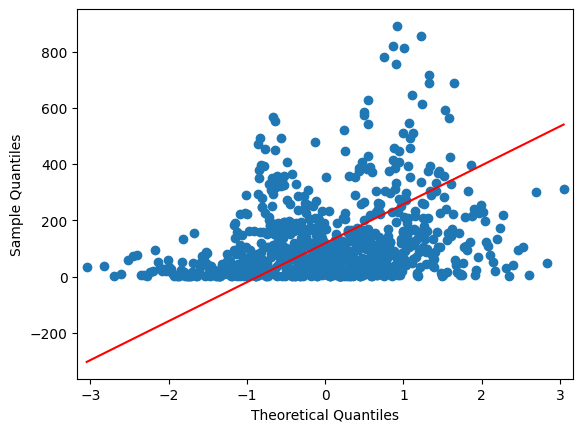

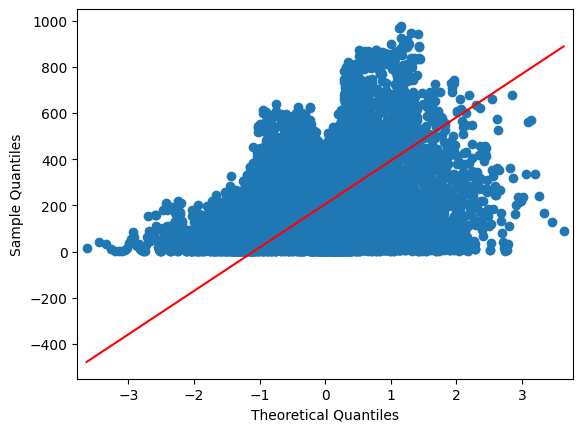

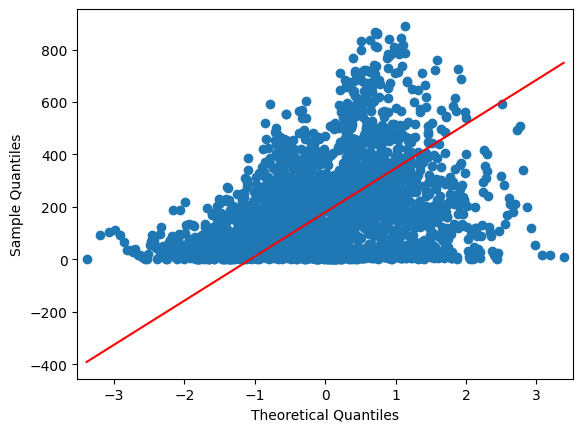

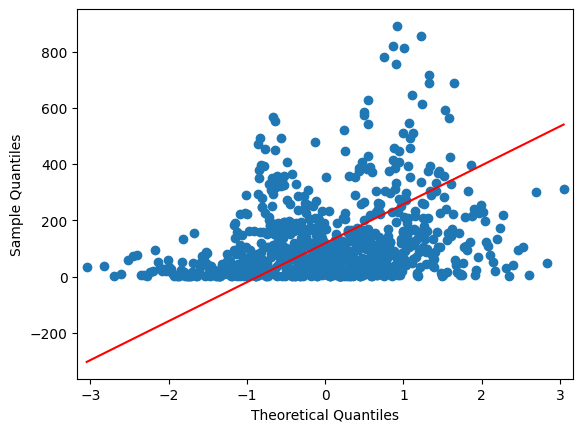

In [49]:
# Normality Test: QQ Plot
from statsmodels.graphics.gofplots import qqplot
qqplot(weather_1, line = "s")
qqplot(weather_2, line = "s")
qqplot(weather_3, line = "s")

# **Inferences from normality test and equal variances test:**

**The Shapiro-Wilk Test on weather data depicted that Weather 1, Weather 2 and Weather 3 data does not show gaussian distribution (normal distribution). Levene's Test depicted that their variances are not equal which was verified by the QQ Plot.**

In [50]:
# ANOVA Test
from scipy.stats import f_oneway
alpha = 0.05

anova_stat, p_value_anova = f_oneway(weather_1, weather_2, weather_3)
print('ANOVA Test:')
print("anova_stat: ", anova_stat)
print("p_value_anova: ", p_value_anova)
print("\n")

print("Interpretation for ANOVA Test:")

if p_value_anova < alpha:
  print("Result : Reject null hypothesis, Weather has effect on bike rentals")
else:
  print("Result : Failed to reject null hypothesis, Weather has no effect on bike rentals")

ANOVA Test:
anova_stat:  [98.28356882]
p_value_anova:  [4.97644851e-43]


Interpretation for ANOVA Test:
Result : Reject null hypothesis, Weather has effect on bike rentals


# **Conclusion:**
**Reject the null hypothesis. Weather has an effect on the number of bikes being rented. The p_value_anova is less than alpha (significance level) = 0.05. Hence, we reject the Null Hypothesis (Ho) and conclude that weather has an effect on bike rentals.**

# **Part D4: Hypothesis Test 4:-**
# **No. of cycles rented similar or different in different seasons.**

##  Ho (Null Hypothesis): Seasons have no effect on bike rentals

## Ha (Alternate Hypothesis): Seasons have effect on bike rentals

## Alpha (Significance level) : 0.05

## Test used: ANOVA Test


Bike rentals (count) is a numerical feature. Seasons is a categorical feature with 4 categories. For this case, the appropriate test is the ANOVA Test because the hypothesis test to understand whether there is an effect of seasons on bike rentals i.e., 1 numerical feature and 1 categorical feature with 4 categories.

Before performing the ANOVA hypothesis test, it is important to do the normality test and equal variances test.

In [51]:
from scipy.stats import shapiro
from scipy.stats import kstest

season_1 = df[df["season"] == "spring"][["count"]]
season_2 = df[df["season"] == "summer"][["count"]]
season_3 = df[df["season"] == "fall"][["count"]]
season_4 = df[df["season"] == "winter"][["count"]]

alpha = 0.05

# Normality Test: Shapiro-Wilk Test

shapiro_stat_s1, p_value_s1 = shapiro(season_1)
print('Shapiro-Wilk Test for Season = 1:')
print("shapiro_stat_s1: ", shapiro_stat_s1)
print("p_value_s1: ", p_value_s1)
print("\n")

shapiro_stat_s2, p_value_s2 = shapiro(season_2)
print('Shapiro-Wilk Test for Season = 2:')
print("shapiro_stat_s2: ", shapiro_stat_s2)
print("p_value_s2: ", p_value_s2)
print("\n")

shapiro_stat_s3, p_value_s3 = shapiro(season_3)
print('Shapiro-Wilk Test for Season = 3:')
print("shapiro_stat_s3: ", shapiro_stat_s3)
print("p_value_s3: ", p_value_s3)
print("\n")

shapiro_stat_s4, p_value_s4 = shapiro(season_4)
print('Shapiro-Wilk Test for Season = 4:')
print("shapiro_stat_s4: ", shapiro_stat_s4)
print("p_value_s4: ", p_value_s4)
print("\n")

print("Interpretation for Shapiro-Wilk Test:")
if p_value_s1 < alpha:
  print("Season 1 data does not show gaussian distribution (normal distribution)")
else:
  print("Season 1 data shows gaussian distribution (normal distribution)")

if p_value_s2 < alpha:
  print("Season 2 data does not show gaussian distribution (normal distribution)")
else:
  print("Season 2 data shows gaussian distribution (normal distribution)")

if p_value_s3 < alpha:
  print("Season 3 data does not show gaussian distribution (normal distribution)")
else:
  print("Season 3 data shows gaussian distribution (normal distribution)")

if p_value_s4 < alpha:
  print("Season 4 data does not show gaussian distribution (normal distribution)")
else:
  print("Season 4 data shows gaussian distribution (normal distribution)")

Shapiro-Wilk Test for Season = 1:
shapiro_stat_s1:  0.8087378401253588
p_value_s1:  8.749584618867662e-49


Shapiro-Wilk Test for Season = 2:
shapiro_stat_s2:  0.9004818080893252
p_value_s2:  6.039374406270491e-39


Shapiro-Wilk Test for Season = 3:
shapiro_stat_s3:  0.9148166372899196
p_value_s3:  1.043680518918597e-36


Shapiro-Wilk Test for Season = 4:
shapiro_stat_s4:  0.8954637482095505
p_value_s4:  1.1299244409282836e-39


Interpretation for Shapiro-Wilk Test:
Season 1 data does not show gaussian distribution (normal distribution)
Season 2 data does not show gaussian distribution (normal distribution)
Season 3 data does not show gaussian distribution (normal distribution)
Season 4 data does not show gaussian distribution (normal distribution)


In [52]:
# Equal Variance Test - Levene's test
# Ho (Null Hypothesis): Variance is equal
# Ha (Alternate Hypothesis): Variance is not equal

from scipy.stats import levene
alpha = 0.05

levene_stat, p_value_levene = levene(season_1, season_2, season_3, season_4)
print('Levene Test:')
print("levene_stat: ", levene_stat)
print("p_value_levene: ", p_value_levene)

if p_value_levene < alpha:
  print("Reject null hypothesis. Variances are not equal ")
else:
  print("Failed to reject null hypothesis. Variances are equal ")

Levene Test:
levene_stat:  [187.7706624]
p_value_levene:  [1.01471169e-118]
Reject null hypothesis. Variances are not equal 


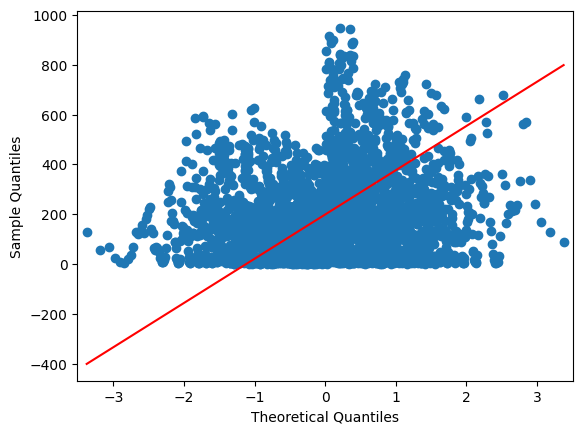

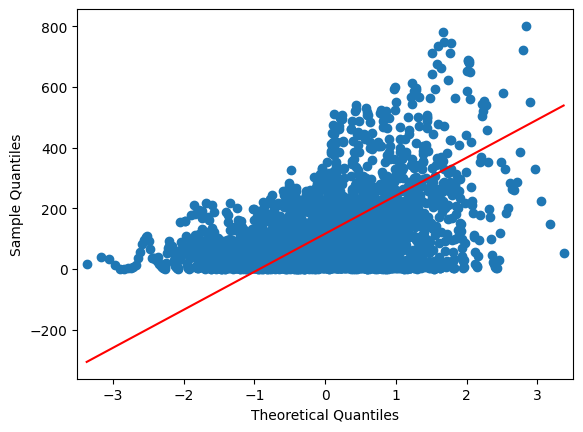

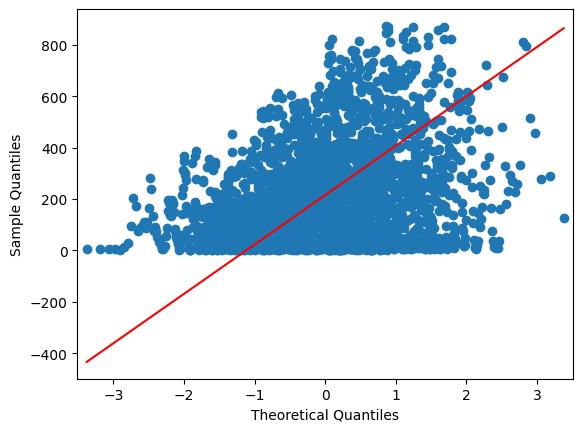

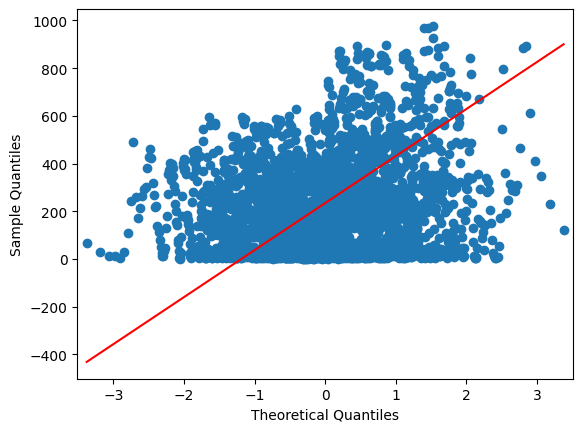

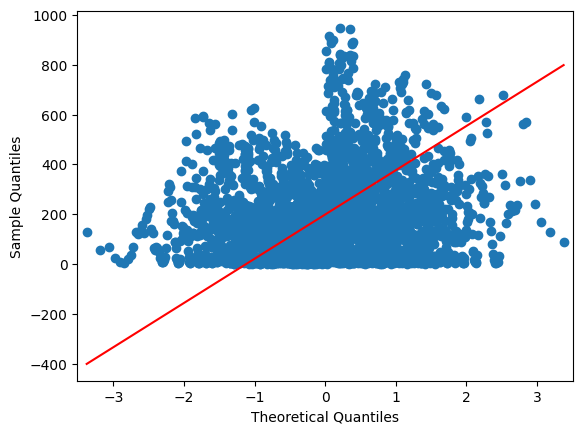

In [53]:
# Normality Test: QQ Plot
# this output shows its not gaussian, since the percentile of sample is not intact with line of gaussian distribution
from statsmodels.graphics.gofplots import qqplot
qqplot(season_1, line = "s")
qqplot(season_2, line = "s")
qqplot(season_3, line = "s")
qqplot(season_4, line = "s")

# **Inferences from normality test and equal variances test:**

**The Shapiro-Wilk Test on season data depicted that Summer, Spring, Winter and Fall seasons data does not show gaussian distribution (normal distribution). Levene's Test depicted that their variances are not equal which was verified by the QQ Plot.**

In [54]:
# ANOVA Test
from scipy.stats import f_oneway
alpha = 0.05

anova_stat, p_value_anova = f_oneway(season_1, season_2, season_3, season_4)
print('ANOVA Test:')
print("anova_stat: ", anova_stat)
print("p_value_anova: ", p_value_anova)
print("\n")

print("Interpretation for ANOVA Test:")

if p_value_anova < alpha:
  print("Result : Reject null hypothesis, Seasons have an effect on bike rentals")
else:
  print("Result : Failed to reject null hypothesis, Seasons have no effect on bike rentals")

ANOVA Test:
anova_stat:  [236.94671081]
p_value_anova:  [6.16484339e-149]


Interpretation for ANOVA Test:
Result : Reject null hypothesis, Seasons have an effect on bike rentals


# **Conclusion:**
**Reject the null hypothesis. Seasons have an effect on the number of bikes being rented. The p_value_anova is less than alpha (significance level) = 0.05. Hence, we reject the Null Hypothesis (Ho) and conclude that seasons have an effect on bike rentals. This also implies that the number of cycles rented is not similar in different weather and seasons.**

# **Insights and Recommendations:**

# **Insights:**

1. More bikes were rented during the summer and fall seasons compared to the other seasons.

2. More bikes were rented during the holidays.

3. From the working day feature, it was observed that whenever there is a holiday or a weekend, more bikes were rented.

4. During extreme weather conditions such as heavy rain, thunderstorm, snow or fog, bike rentals dipped.

5. When the humidity is less than 20%, the number of bike rentals was extremely low. When the temperature is less than 10 degrees, the number of bike rentals decreases and when the windspeed exceeds areound 35, the bike rentals also decreases.

# **Recommendations:**

1. During the summer and fall seasons, the company should have more bikes available since there is more demand compared to other seasons.

2. Working days have no effect on bike rentals. However, weather and seasons have an effect on bike rentals. Hence, enhanced rental strategies during adverse weather and seasonal conditions is needed.

3. Since season has an effect on bike rentals, the company must cater to the demand during off-season as well as seasonal period.

4. Registered users are the top contributors and so the company must continue to sustain the levels throughout the year including maintenance of the bikes and service requests of the users.